In [ ]:
# Ignore the warnings
import warnings
# warnings.filterwarning("always")
warnings.filterwarnings("ignore")

# System related and Data input controls
import os

import re
from typing import *
import missingno as msno

# Web Scraping & Crawling
import requests
from bs4 import BeautifulSoup
from xml.etree import ElementTree as ET

import urllib.request
import json
from pandas.io.json import json_normalize

# Data manipulation and visualization
import pandas as pd
import datetime
# pd.options.display.float_format = "{:, 0.2f}".format
# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 20
# pd.set_option("display.max_rows", None)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
!pip install pycaret
from pycaret.classification import *

# Modeling algorithms
# (1) General
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.preprocessing import *

# (2) Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sys import executable
# print(executable)
# C:\ProgramData\anaconda3\python.exe

import sys
# print(sys.path)
# C:\programdata\anaconda3\lib\site-packages

# [Error]
# python3 -m ipykernel install --user
# /C:/ProgramData/anaconda3/python -m pip install request
# !{sys.executable} -m pip install request
# !conda install --yes --prefix {sys.prefix} request

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from tqdm import tqdm
import time
time.sleep(2)

### **1.시계열 데이터 분석**

##### 1.건별 종목정보(금리 등)

getRepoInterest : 환매조건부채권 금리

    # baseDate | 기준일자
    # repoID | RP일련번호
    # repoBuySecurities | 기업어음의 매입증권 종류를 관리하는 코드 (통안채, 국채, 은행채 등)
    # repoBuyApplyCurrent | 기업어음의 매입증권 종류를 관리하는 코드 (통안채, 국채, 은행채 등)
    # repoBuyApplyCurrentNM | 환매조건부채권(RP)을 매입 할때 적용되는 통화를 관리하는 코드의 명칭
    # repoDepositTermCode | 상환 기간에 따라 기간을 분류한 코드
    # repoDepositTermCodeNM | 상환 기간에 따라 기간을 분류한 코드의 명칭
    # repoRemainingExprDcd | 기업어음(RP)의 잔존 만기 기간을 구분하는 코드
    # repoRemainingExprDcdNM | 기업어음(RP)의 잔존 만기 기간을 구분하는 코드의 명칭
    # purchaseBzTypeCode | 매수자 업종별 유형을 관리하는 코드
    # purchaseBzTypeCodeNM| 매수자 업종별 유형을 관리하는 코드의 명칭
    # sellerBzTypeCode | 매도자 업종별 유형을 관리하는 코드
    # sellerBzTypeCodeNM | 매도자 업종별 유형을 관리하는 코드의 명칭
    # repoInterest | 환매조건부채권거래 매수자 제공 매입금액에 대한 이율

In [ ]:
# GetRepoTradInfoService
    # 기준일자, RP거래일자를 조회하여
    # 건별거래, 매입증권별잔고금액, 통화별잔고금액을 제공하는 금융위원회_REPO거래정보

class GetRepoTradingInfoService():

    def __init__(self,
                 request_url: str,
                 parameters = None,
                 response = None,
                 repo_object = None):

        self.request_url = request_url
        self.response = response
        self.repo_object = repo_object
            # encoding key = "XaWt3XckF7z5yo3JX%2BMBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg%3D%3D"
            # decoding key = "XaWt3XckF7z5yo3JX+MBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg=="


# requestHTMLWebpage()
    def requestHTMLWebpage(self, baseDate: str):

    # 공공데이터포털에서 xml 데이터 요청
        parameters ={
            "serviceKey" : "XaWt3XckF7z5yo3JX+MBifN3A6o6cBoIlo3hB0sZznUGKpCHCcOZz4ifqAYfWcRPYLWjJG2dbqEFUXfmr29Xzg==",
            "numOfRows" : "1",
            "pageNo" : "1",
            "resultType" : "xml",
            "basDt" : baseDate}
            # 분석에 활용하기 위한 수집 방법
                # 파라미터 딕셔너리의 key값을 변수로 변환하여 class의 method return값을 for문을 통해 날짜별로 생성하여
                # 전역공간에 데이터프레임으로 일별 환매조건부매매채권 데이터 1차원 배열을 병합

        response = requests.get(
            self.request_url,
            params = parameters)
            # timeout = 0.1)
        self.response = response
            # request_url
                # [통화별잔고금액] http://apis.data.go.kr/1160100/service/GetRepoItemInfoService/getInteRateInfo
                # [건별거래조회] http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getCaseForTrad
                # [매입증권별 잔고금액 조회] http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getBuyiSecuBala
        # print(response.content)
        # print(response.text)
                # 요청한 웹페이지 문서가 로드되었는지 확인용

    # 데이터 수집
        soup_object = BeautifulSoup(response.content,
                            "lxml-xml")
        repo_object = soup_object.find_all("item")
        self.repo_object = repo_object


# Trial & Error : 지속가능성이 없는 방법으로 사용하지 않음
# getInterestRateData()
# REPO 종목정보
    def getInterestRateData(self):

    # 데이터 정리
        RepoInterestData: List = []

        for i in range(len(self.repo_object)):

            baseDate = self.repo_object[i].basDt.string.strip()
            repoID = self.repo_object[i].rpSqno.string.strip()

            repoBuySecurities = self.repo_object[i].rpBuyScrtKcd.string.strip()
            repoBuyApplyCurrent = self.repo_object[i].rpBuyAplCurCd.string.strip()
            repoBuyApplyCurrentNM = self.repo_object[i].rpBuyAplCurCdNm.string.strip()

            repoDepositTermCode = self.repo_object[i].rdptTermCcd.string.strip()
            repoDepositTermCodeNM = self.repo_object[i].rdptTermCcdNm.string.strip()

            repoRemainingExprDcd = self.repo_object[i].rpRmngExprDcd.string.strip()
            repoRemainingExprDcdNm = self.repo_object[i].rpRmngExprDcdNm.string.strip()

            purchaseBzTypeCode = self.repo_object[i].purcBzcTcd.string.strip()
            purchaseBzTypeCodeNM = self.repo_object[i].purcBzcTcdNm.string.strip()
            sellerBzTypeCode = self.repo_object[i].slrBzcTcd.string.strip()
            sellerBzTypeCodeNM = self.repo_object[i].slrBzcTcdNm.string.strip()

            repoInterest = self.repo_object[i].rpInrt.string.strip()

            RepoInterestData = [
                baseDate, repoID,
                repoBuySecurities, repoBuyApplyCurrent, repoBuyApplyCurrentNM,
                repoDepositTermCode, repoDepositTermCodeNM, repoRemainingExprDcd, repoRemainingExprDcdNm,
                purchaseBzTypeCode, purchaseBzTypeCodeNM, sellerBzTypeCode, sellerBzTypeCodeNM, repoInterest]

            RepoInterestData.append(RepoInterestData)

        return RepoInterestData


# getTradingData()
# Repo 거래정보
    def getTradingData(self):

        listofItems: List = []
        listofItems = [ [data.text for data in item] for item in self.repo_object ]
        listofItems = list(*listofItems)
          # 이중 리스트에 내포된 <items> tag 내 데이터를 에스터리스크 *를 활용하여 단일 리스트 내 포함되도록 함
        listofItem = list(filter(lambda data: data != "\n", listofItems))
          # <items>

        return listofItem

In [ ]:
getRepoInterest = GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoItemInfoService/getInteRateInfo"
)
getRepoInterest.requestHTMLWebpage(
    baseDate = "20200304")

In [ ]:
getRepoInterest.getInterestRateData()

['20200304',
 '202003040001',
 '1150',
 'KRW',
 '대한민국 원',
 '1',
 '1영업일',
 '11',
 '1년이하',
 '0202',
 '은행(신탁)',
 '0101',
 '증권사',
 '1.43',
 [...]]

##### 2.건별 거래조회, 매입증권별 잔고금액 조회, 통화별 잔고금액 조회

(1) getCaseForTrad : RP이율, RP증거금비율, 매입증권매입금액, 매입증권평가금액등을 조회하는 건별거래조회

(2) getBuyiSecuBala : RP국채담보금액, RP금융채담보금액, 지방채담보금액, 담보총합계금액등을 조회

(3) getCurrBala : RP거래일자를 통하여 거래유형코드, RP매입적용통화코드, RP매입적용통화코드명, RP통화잔액등을 조회

In [ ]:
getCaseForTrading = GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getCaseForTrad"
)
getBuyiSecuritiesBalance = GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getBuyiSecuBala"
)
getCurrentBalanceSheet =  GetRepoTradingInfoService(
    request_url = "http://apis.data.go.kr/1160100/service/GetRepoTradInfoService/getCurrBala"
)

In [ ]:
# [Instance] getCaseForTrading
# self.repo_object
getCaseForTrading.requestHTMLWebpage(baseDate = "20200303")
# self.response.text
getCaseForTrading.getTradingData()

# [Instance] getBuyiSecuritiesBalance
# self.repo_object
getBuyiSecuritiesBalance.requestHTMLWebpage(baseDate = "20200303")
# self.response.text
getBuyiSecuritiesBalance.getTradingData()

# [Instance] getCurrentBalanceSheet
# self.repo_object
getCurrentBalanceSheet.requestHTMLWebpage(baseDate = "20200303")
# self.response.text
getCurrentBalanceSheet.getTradingData()

[<item>
<basDt>20200303</basDt>
<buyScrtBuyAmt>5500000000</buyScrtBuyAmt>
<buyScrtCnt>5800000000</buyScrtCnt>
<buyScrtEvlAmt>5843505800</buyScrtEvlAmt>
<buynShtrFinBzcDcd>0204</buynShtrFinBzcDcd>
<buynShtrFinBzcDcdNm>집합투자</buynShtrFinBzcDcdNm>
<isinCd>KR310502G957</isinCd>
<isinCdNm>중금채(신) 1905이2A-15</isinCdNm>
<rdptTermCcd>2</rdptTermCcd>
<rdptTermCcdNm>2영업일이상 7일미만</rdptTermCcdNm>
<rpBuyAmt>5500000000</rpBuyAmt>
<rpBuyAplCurCd>KRW</rpBuyAplCurCd>
<rpBuyAplCurCdNm>대한민국 원</rpBuyAplCurCdNm>
<rpInrt>1.35</rpInrt>
<rpMrgamRto>105</rpMrgamRto>
<rpOpngDt>20200303</rpOpngDt>
<rpRmngExprDcd>12</rpRmngExprDcd>
<rpRmngExprDcdNm>3년이하</rpRmngExprDcdNm>
<rpSqno>202003030001</rpSqno>
<scrsItmsKcd>1150</scrsItmsKcd>
<scrsItmsKcdNm>은행채</scrsItmsKcdNm>
<slngShtrFinBzcDcd>0204</slngShtrFinBzcDcd>
<slngShtrFinBzcDcdNm>집합투자</slngShtrFinBzcDcdNm>
</item>]
[<item>
<basDt>20200303</basDt>
<etcBondMogAmt>0</etcBondMogAmt>
<etfMogAmt>694159073000</etfMogAmt>
<lcbndMogAmt>348309276509</lcbndMogAmt>
<mogTsumAmt>

['CNY', '위안화', '89360181', '20140829', '02', '']

In [ ]:
CaseForTradingRepo = pd.DataFrame()
col_num = 0

dates = pd.date_range(
    "2020-01-01",
    "2023-01-01",
    freq = "D")
    # [freq] D, M, Y
    # start_date = pd.to_datetime('2020-01-01')
    # end_date = pd.to_datetime('2023-01-01')
date_list = dates.strftime("%Y%m%d").tolist()

In [ ]:
# self.repo_object
getCaseForTrading.requestHTMLWebpage(baseDate = "20200103")

# self.response.text
getCaseForTrading.getTradingData()

['20200103',
 '9610805222',
 '10000000000',
 '10110250000',
 '0202',
 '은행(신탁)',
 'KR60000148C7',
 '신한은행 22-12-이-3-B',
 '1',
 '1영업일',
 '100000000000',
 'KRW',
 '대한민국 원',
 '1.43',
 '105',
 '20200103',
 '12',
 '3년이하',
 '202001030001',
 '1150',
 '은행채',
 '0101',
 '증권사']

In [ ]:
len(date_list), date_list[0], date_list[-1]

(1097, '20200101', '20230101')

#### 3.Repo data : JH Solution

(1) 영업일 및 비영업일 구분하는 try except문

(2) for문에서 dictionary 타입 활용하여 각 시계열 key에 해당하는  환매조건부채권 value값 병합

In [ ]:
for date in date_list[:10]:
    try:
        getCaseForTrading.requestHTMLWebpage(baseDate = date)
        # self.response.text
        print(# "\n column 갯수:",
              len( getCaseForTrading.getTradingData() ))
        print(bool( getCaseForTrading.getTradingData() ))
        CaseForTradingRepo.loc[col_num, :] = getCaseForTrading.getTradingData()

    except:
        print(":비영업일")
        pass

0
False
23
True
:비영업일
23
True
:비영업일
0
False
0
False
23
True
:비영업일
23
True
:비영업일
23
True
:비영업일
23
True
:비영업일
23
True
:비영업일


In [ ]:
tmp_dict = {}

for i, date in enumerate(tqdm(date_list)):

    getCaseForTrading.requestHTMLWebpage(baseDate = date)

    if bool(getCaseForTrading.getTradingData()) == True:
        # print(len(getCaseForTrading.getTradingData()))
        tmp_dict[i] = getCaseForTrading.getTradingData()
    else:
        # print(len(getCaseForTrading.getTradingData()))
        pass

100%|██████████| 1097/1097 [08:28<00:00,  2.16it/s]


In [ ]:
CaseForTradingRepo = pd.DataFrame( tmp_dict ).transpose()
CaseForTradingRepo.reset_index(drop = True, inplace = True)
CaseForTradingRepo.columns = [
    "기준일자", "매입증권수", "매입증권매입금액", "매입증권평가금액", "매수단기금융업종구분코드", "매수단기금융업종명", "유가증권국제인증고유번호",
    "유가증권국제인증고유번호코드명", "상환기간분류코드", "상환기간분류코드명",
    "RP매입금액", "RP매입적용통화코드", "RP매입적용통화명", "RP이율", "RP증거금비율",
    "RP개시일자", "RP잔존만기구분코드", "RP잔존만기", "RP일련번호", "유가증권종목종류코드", # 우선주/보통주
    "유가증권종목명", "매도단기금융업종구분코드", "매도단기금융업종명"
]
CaseForTradingRepo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   기준일자             680 non-null    object
 1   매입증권수            680 non-null    object
 2   매입증권매입금액         680 non-null    object
 3   매입증권평가금액         680 non-null    object
 4   매수단기금융업종구분코드     680 non-null    object
 5   매수단기금융업종명        680 non-null    object
 6   유가증권국제인증고유번호     680 non-null    object
 7   유가증권국제인증고유번호코드명  680 non-null    object
 8   상환기간분류코드         680 non-null    object
 9   상환기간분류코드명        680 non-null    object
 10  RP매입금액           680 non-null    object
 11  RP매입적용통화코드       680 non-null    object
 12  RP매입적용통화명        680 non-null    object
 13  RP이율             680 non-null    object
 14  RP증거금비율          680 non-null    object
 15  RP개시일자           680 non-null    object
 16  RP잔존만기구분코드       680 non-null    object
 17  RP잔존만기           680 non-null    ob

In [ ]:
CaseForTradingRepo.iloc[0:10, ]
  # 2020-01-10 데이터 반복되어 하단의 TimeSeriesFeatureEngineering에서 reindex(asfreq = "Day") 시 오류 발생

,기준일자,매입증권수,매입증권매입금액,매입증권평가금액,매수단기금융업종구분코드,매수단기금융업종명,유가증권국제인증고유번호,유가증권국제인증고유번호코드명,상환기간분류코드,상환기간분류코드명,...,RP이율,RP증거금비율,RP개시일자,RP잔존만기구분코드,RP잔존만기,RP일련번호,유가증권종목종류코드,유가증권종목명,매도단기금융업종구분코드,매도단기금융업종명
0,20200110,1000000,1020000000,1283883180,201,증권사(신탁),KR1035037T34,국고채권 05250-2703(07-3),1,1영업일,...,1.75,108,20200110,14.0,10년이하,202001100001,1110,국채,101,증권사
1,20200103,9610805222,10000000000,10110250000,202,은행(신탁),KR60000148C7,신한은행 22-12-이-3-B,1,1영업일,...,1.43,105,20200103,12.0,3년이하,202001030001,1150,은행채,101,증권사
2,20200106,19059592543,20000000000,20031100000,201,증권사(신탁),KR310508G996,중소기업은행(신) 1909이1.5A-24,1,1영업일,...,1.40,105,20200106,12.0,3년이하,202001060001,1150,은행채,701,여신 금융업
3,20200107,1000000,1020000000,1295321460,201,증권사(신탁),KR1035037T34,국고채권 05250-2703(07-3),1,1영업일,...,1.75,108,20200107,14.0,10년이하,202001070001,1110,국채,101,증권사
4,20200108,1000000,1020000000,1289487060,201,증권사(신탁),KR1035037T34,국고채권 05250-2703(07-3),1,1영업일,...,1.75,108,20200108,14.0,10년이하,202001080001,1110,국채,101,증권사
5,20200109,1000000000,1050000000,1055736150,204,집합투자,KR6000881732,한화 216,1,1영업일,...,1.45,105,20200109,11.0,1년이하,202001090001,1170,회사채,204,집합투자
6,20200110,1000000,1020000000,1283883180,201,증권사(신탁),KR1035037T34,국고채권 05250-2703(07-3),1,1영업일,...,1.75,108,20200110,14.0,10년이하,202001100001,1110,국채,101,증권사
7,20200113,800000000,843000000,840052872,204,집합투자,KR6003411990,쌍용양회공업 313-2,1,1영업일,...,1.50,105,20200113,13.0,5년이하,202001130001,1170,회사채,101,증권사
8,20200114,9542417377,10000000000,10056870000,101,증권사,KR310201G915,산금채 19신이0200-0102-1,1,1영업일,...,1.35,105,20200114,11.0,1년이하,202001140001,1150,은행채,701,여신 금융업
9,20200115,1000000,1020000000,1284409500,201,증권사(신탁),KR1035037T34,국고채권 05250-2703(07-3),1,1영업일,...,1.75,108,20200115,14.0,10년이하,202001150001,1110,국채,101,증권사


In [ ]:
CaseForTradingRepo.drop(0, axis = 0, inplace = True)

In [ ]:
CaseForTradingRepo.to_csv(
    "/content/drive/MyDrive/archive/CaseForTradingRepoData.csv",
    index = False,
    encoding = "utf-8"
)
# CaseForTradingRepo.to_excel("./RepoCaseForTradingData.xlsx")

---

In [ ]:
BuyRepoSecuritiesBalance = pd.DataFrame()

for date in date_list[:10]:
    try:
        getBuyiSecuritiesBalance.requestHTMLWebpage(baseDate = date)
        # self.response.text
        print(# "\n column 갯수:",
              len( getBuyiSecuritiesBalance.getTradingData() ))
        print(bool( getBuyiSecuritiesBalance.getTradingData() ))
        BuyRepoSecuritiesBalance.loc[col_num, :] = getBuyiSecuritiesBalance.getTradingData()

    except:
        print(":비영업일")
        pass

0
False
12
True
:비영업일
12
True
:비영업일
0
False
0
False
12
True
:비영업일
12
True
:비영업일
12
True
:비영업일
12
True
:비영업일
12
True
:비영업일


In [ ]:
tmp_dict = {}

for i, date in enumerate(tqdm(date_list)):

    getBuyiSecuritiesBalance.requestHTMLWebpage(baseDate = date)

    if bool(getBuyiSecuritiesBalance.getTradingData()) == True:
        # print(len(getBuyiSecuritiesBalance.getTradingData()))
        tmp_dict[i] = getBuyiSecuritiesBalance.getTradingData()
    else:
        # print(len(getBuyiSecuritiesBalance.getTradingData()))
        pass

100%|██████████| 1097/1097 [10:01<00:00,  1.82it/s]


In [ ]:
BuyRepoSecuritiesBalance = pd.DataFrame( tmp_dict ).transpose()
BuyRepoSecuritiesBalance.reset_index(drop = True, inplace = True)
BuyRepoSecuritiesBalance.columns = [
    "기준일자", "기타채권담보금액", "ETF담보금액", "지방채담보금액", "담보총합계금액",
    "RP회사채담보금액", "RP금융채담보금액", "RP국채담보금액",
    "RP통안채담보금액", "RP특수채담보금액", "RP유형코드", "RP유형"
]
BuyRepoSecuritiesBalance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준일자       745 non-null    int64 
 1   기타채권담보금액   745 non-null    int64 
 2   ETF담보금액    745 non-null    int64 
 3   지방채담보금액    745 non-null    int64 
 4   RP회사채담보금액  745 non-null    int64 
 5   담보총합계금액    745 non-null    int64 
 6   RP회사채담보금액  745 non-null    int64 
 7   RP금융채담보금액  745 non-null    int64 
 8   RP국채담보금액   745 non-null    int64 
 9   RP통안채담보금액  745 non-null    int64 
 10  RP유형코드     745 non-null    int64 
 11  RP유형       745 non-null    object
dtypes: int64(11), object(1)
memory usage: 70.0+ KB


In [ ]:
BuyRepoSecuritiesBalance.to_csv(
    "/content/drive/MyDrive/archive/BuyRepoSecuritiesBalance.csv",
    index = False,
    encoding = "utf-8")

---

#### 4.Feature Engineering: 설명변수 X의 현실적 데이터 전처리 방향

* **시간현실반영**
* 변수 간 스케일 조정
* 다중공선성 제거

##### 1) 시간현실반영

* 임의의 $t$에 대하여 $E(X_{t}) = μ $

* 임의의 $t$에 대하여 $Var(X_t) < ∞ $
: 분산이 안정적이지 못하기 때문에 정상적이지 않을 수도 있다.

* 임의의 t, h에 대하여 $Cov(X_{t+h}, X_t) = 𝛤(h) $
: 두 시점의 자기공분산(t+h시점과 t시점 간 공분산)은 시차(time lag)에만 의존한다, 약정상성을 띄는 시계열 데이터는 t시점에 관측하더라도 기댓값과 분산이 변하지 않는다.

* ADF Test 모듈 내부 알고리즘

  ```
if regression != "n":
        resols = OLS(
            xdshort, add_trend(xdall[:, : usedlag + 1], regression)
        ).fit()
    else:
        resols = OLS(xdshort, xdall[:, : usedlag + 1]).fit()
```

In [14]:
class TimeSeriesFeatureEngineering():

  def __init__(self,
               trading_repo_path: str, bs_repo_path: str,
               # X_train = None, X_test = None, Y_train = None, Y_test = None,
               dataframe_Nonfe_factor_to_dummy = None, dataframe_fe_factor_to_dummy = None,
               stationary_adf = None, stationary_kpss = None):

    self.trading_repo_path = trading_repo_path
    self.bs_repo_path = bs_repo_path
    # self.X_train = X_train
    # self.X_test = X_test
    # self.Y_train = Y_train
    # self.Y_test = Y_test

    self.dataframe_Nonfe_factor_to_dummy = dataframe_Nonfe_factor_to_dummy
    self.dataframe_fe_factor_to_dummy = dataframe_fe_factor_to_dummy
    self.stationary_adf = stationary_adf
    self.stationary_kpss = stationary_kpss


# ImportDataset()
  # GetRepoTradingInfoService 클래스를 통해 불러온 2020-01-01 ~ 2023-01-01까지
  # 환매조건부채권(RP) 건별거래, 매입증권별잔고금액 데이터 로드하여 dataframe으로 병합
  # 클래스 내부에 캡슐화하지 않고 main()에서 return값으로 생성하여 전역공간에 저장
  def ImportDataset(self):

    CaseForTradingRepo = pd.read_csv(
        self.trading_repo_path, index_col = False, encoding = "utf-8")
    BuyRepoSecuritiesBalance = pd.read_csv(
        self.bs_repo_path, index_col = False, encoding = "utf-8")
    dataframe = CaseForTradingRepo.merge(
        right = BuyRepoSecuritiesBalance.select_dtypes(exclude = ["category", "object"]).drop("RP유형코드", axis = 1),
        how = "left",
        on = "기준일자")
    # dataframe = CaseForTradingRepo.copy()
    return dataframe


# NonFeatureEngineering()
# 데이터 전처리하지 않은 데이터프레임 반환(F.E한 경우와 비교 목적)
  def NonFeatureEngineering(self, date_column, dataframe):

  # 기준일자 컬럼을 date_column변수로 입력받아 날짜형 타입 변환
    dataframe[date_column] = dataframe[date_column].astype("str")
    dataframe[date_column] = dataframe[date_column].apply(
        lambda x: datetime.datetime.strptime(x, "%Y%m%d"))
    # [AttributeError] module 'datetime' has no attribute 'strftime'
      # dataframe[date_column] = dataframe[date_column].apply(lambda x: x.strftime("%Y-%m-%d"))
      # dataframe[date_column] = dataframe[date_column].apply(lambda x: x.datetime.strftime("%Y-%m-%d"))
    # [ValueError] time data '20200110' does not match format '%Y-%m-%d'
      # dataframe[date_column] = dataframe[date_column].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

    if date_column in dataframe.columns:
      # dataframe["datetime"] = pd.to_datetime(dataframe[date_column])
      dataframe["DateTime"] = pd.to_datetime(dataframe[date_column])
  # 인덱스 타입이 64비트 정수형이면, DateTime컬럼으로 변경
    if dataframe.index.dtype == "int64":
      dataframe.set_index("DateTime", inplace = True)
    dataframe.drop(["기준일자", "RP개시일자", "RP일련번호"], axis = 1, inplace = True)

  # 범주형 변수 더미화 및 범주형 변수 코드명(식별자) 제거
    dataframe.drop(
        ["매수단기금융업종구분코드", "RP매입적용통화코드",
         "유가증권종목종류코드", "유가증권국제인증고유번호", "유가증권국제인증고유번호코드명",
         "상환기간분류코드", "RP잔존만기구분코드", "매도단기금융업종구분코드"], axis = 1, inplace = True)
    factor_column_list: List = dataframe.select_dtypes(include = "object").columns.tolist()
    dataframe[factor_column_list] = dataframe[factor_column_list].astype("category")
    pd.get_dummies(dataframe, columns = factor_column_list)
    self.dataframe_Nonfe_factor_to_dummy = pd.get_dummies(data = dataframe[factor_column_list])
    dataframe.drop(factor_column_list, axis = 1, inplace = True)

    dataframe_NonFE = dataframe.copy()
    dataframe_NonFE.drop("datetime", axis = 1, inplace = True)
    return dataframe_NonFE


# FeatureEngineering()
  def FeatureEngineering(self,
                         date_column: str, dataframe: str,
                         Y: str, decompose_method: str,
                         grouping_feature: str):

  # 기준일자 컬럼을 date_column변수로 입력받아 날짜형 타입 변환
    dataframe[date_column] = dataframe[date_column].astype("str")
    dataframe[date_column] = dataframe[date_column].apply(
        lambda x: datetime.datetime.strptime(x, "%Y%m%d"))
    # pd.set_option("display.max_rows", None)
    # print(dataframe.groupby([date_column]).size())

    if date_column in dataframe.columns:
      # dataframe["datetime"] = pd.to_datetime(dataframe[date_column])
      dataframe["DateTime"] = pd.to_datetime(dataframe[date_column])
  # 인덱스 타입이 64비트 정수형이면, DateTime컬럼으로 변경
    if dataframe.index.dtype == "int64":
      dataframe.set_index("DateTime", inplace = True)
  # 인덱스 시계열 "Day" 1일 단위로 설정
    dataframe.drop(["기준일자", "RP개시일자", "RP일련번호"], axis = 1, inplace = True)
    # print(dataframe, dataframe.info())
    dataframe = dataframe.asfreq("D", method = "ffill")
      # [ValueError] cannot reindex a non-unique index with a method or limit

  # 범주형 변수 더미화 및 범주형 변수 코드명(식별자) 제거 -> 오류의 연속
    dataframe.drop(
        ["매수단기금융업종구분코드", "RP매입적용통화코드",
         "유가증권종목종류코드", "유가증권국제인증고유번호", "유가증권국제인증고유번호코드명",
         "상환기간분류코드", "RP잔존만기구분코드", "매도단기금융업종구분코드"], axis = 1, inplace = True)
    factor_column_list: List = dataframe.select_dtypes(include = "object").columns.tolist()
    dataframe[factor_column_list] = dataframe[factor_column_list].astype("category")
    # [print(dataframe[column_name].unique()) for column_name in factor_column_list]

    self.dataframe_fe_factor_to_dummy = pd.get_dummies(data = dataframe[factor_column_list])
      # pandas.get_dummies는 train 데이터의 특성을 학습하지 않기 때문에 train 데이터에만 있고
      # test 데이터에는 없는 카테고리를 test 데이터에서 원핫인코딩 된 칼럼으로 바꿔주지 않는다.
      # 결론은 쓰지 말아야 한다?

    # dummyTransformer = OneHotEncoder()
    # dummyTransformer.fit(dataframe[factor_column_list])

    # dataframe_factor_to_dummy = pd.DataFrame()
    # for column_name in factor_column_list:
      # dummyTransformer.fit(np.asarray(dataframe[[column_name]]).reshape(-1, 1))
        # ValueError: Expected 2D array, got 1D array instead: array=['은행(신탁)' '은행(신탁)' '은행(신탁)' ... '은행(신탁)' '국내은행' '여신 금융업']
        # Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
      # dataframe_factor_to_dummy = dummyTransformer.fit_transform(dataframe[column_name])
      # dataframe_factor_to_dummy = pd.DataFrame(
          # dataframe_factor_to_dummy, columns = [column_name + col for col in dummyTransformer.categories_[0]])
    # print(dataframe_factor_to_dummy)

    # [ValueError] Shape of passed values is (1093, 1), indices imply (1093, 12)
      # globals()["dataframe_factor_to_dummy_{}".format(column_name)] = dummyTransformer.transform(dataframe[[column_name]])
          # '<class 'scipy.sparse._csr.csr_matrix'>' 희소행렬로 반환
      # globals()["dataframe_factor_to_dummy_{}".format(column_name)]= pd.DataFrame(
          # globals()["dataframe_factor_to_dummy_{}".format(column_name)], columns = [column_name + col for col in dummyTransformer.categories_[0]])
          # TypeError: Field elements must be 2- or 3-tuples, got ''매수단기금융업종명''

    dataframe.drop(factor_column_list, axis = 1, inplace = True)

  # 시계열 분해 : 추세 + 계절성 + 잔차 or 추세 * 계절성 * 잔차
    decomposition = sm.tsa.seasonal_decompose(
        dataframe[Y],
        model = decompose_method)
      # sm.tsa.seasonal_decompose(model = "")
      # [input] additive, multicative
    Y_trend = pd.DataFrame(
        decomposition.trend)
    Y_trend.fillna(method = "ffill", inplace = True)
    Y_trend.fillna(method = "bfill", inplace = True)
    Y_trend.columns = ["y_trend"]
      # f{} string formating으로 변수명 입력받을 수 있으나 생략

    Y_seasonal = pd.DataFrame(
        decomposition.seasonal)
    Y_seasonal.fillna(method = "ffill", inplace = True)
    Y_seasonal.fillna(method = "bfill", inplace = True)
    Y_seasonal.columns = ["y_seasonal"]

    pd.concat([dataframe, Y_trend, Y_seasonal], axis = 1).isnull().sum()
    if "y_trend" not in dataframe.columns:
      if "y_seasonal" not in dataframe.columns:
        dataframe = pd.concat([dataframe, Y_trend, Y_seasonal], axis = 1)

  # 특정 시점을 기준으로 전후 12일씩 총 24일간의 이동평균된 pandas Series타입
    Y_day = dataframe[[Y]].rolling(24).mean()
    Y_day.fillna(method = "ffill", inplace = True)
    Y_day.fillna(method = "bfill", inplace = True)
    Y_day.columns = ["y_day"]

    Y_week = dataframe[[Y]].rolling(24 * 7).mean()
    Y_week.fillna(method = "ffill", inplace = True)
    Y_week.fillna(method = "bfill", inplace = True)
    Y_week.columns = ["y_week"]

    if "y_day" not in dataframe.columns:
      if "y_week" not in dataframe.columns:
        dataframe = pd.concat([dataframe, Y_day, Y_week], axis = 1)

  # 정상성(stationarity)을 나타내지 않는 시계열의 정상성을 나타내도록, 추세나 계절성을 완화하는 차분
  # 시계열의 수준에서 나타나는 변화를 제거하여 시계열의 평균 변화를 일정하게 만드는데 도움이 된다.
  # 다시 말해 비정상적 시계열은 누적 과정(integrated procss)이기 때문에 발생할 수 있다.
  # (https://otexts.com/fppkr/decomposition.html)
    Y_differencing = dataframe[[Y]].diff()
    Y_differencing.fillna(method = "ffill", inplace = True)
    Y_differencing.fillna(method = "bfill", inplace = True)
      # [관측값의 차이, 차분] y_t = y_{t-1} + e_t
      # [2차 차분] ( y_t - y_{t-1} ) - ( y_{t-1} - y_{t-2} )
      # 2차 이상의 차분을 한 데이터로 적합한 모델의 설명력이 낮아질 수 있다.
      # [계절성 차분] y_t - y_{t-m} (단, m은 계절 수)
    Y_differencing.columns = ["y_difference"]
    if "y_difference" not in dataframe.columns:
      dataframe = pd.concat([dataframe, Y_differencing], axis = 1)

  # MMMM-YY-DD HH (Week) 분할
    # dataframe[f"{grouping_feature}group"] = pd.cut(dataframe[grouping_feature], 10)

    dataframe["datetime"] = dataframe.index
    dataframe["Year"] = dataframe["datetime"].dt.year
    dataframe["Quarter"] = dataframe["datetime"].dt.quarter
    dataframe["Quarter_version2"] = dataframe["Quarter"] + (dataframe["Year"] - dataframe["Year"].min()) * 4
    dataframe["Day"] = dataframe["datetime"].dt.day
    dataframe["DayofWeek"] = dataframe["datetime"].dt.dayofweek

  # 데이터 관측시점들 간의 시차(lagging) 효과 반영
    dataframe["Y_lag1"] = dataframe[Y].shift(1)
    dataframe["Y_lag2"] = dataframe[Y].shift(2)
    dataframe["Y_lag1"].fillna(method = "bfill", inplace = True)
    dataframe["Y_lag2"].fillna(method = "bfill", inplace = True)

  # 분기 더미변수 생성
    if "Quarter" not in dataframe.columns:
      if "QuarterDummy" not in ["_".join(column.split("_")[:2])
                                for column in dataframe.columns]:
          dataframe = pd.concat(
              [dataframe, pd.get_dummies(dataframe["Quarter"], prefix = "QuarterDummy", drop_first=True)],
              axis=1)
          del dataframe["Quarter"]

    dataframe_FE = dataframe.copy()
    dataframe_FE.drop("datetime", axis = 1, inplace = True)
    return dataframe_FE


  def NumericDataMergeDummy(self, dataframe, feature_engineeringTF: str):

  # TypeError: TimeSeriesFeatureEngineering.NumericDataMergeDummy()
  # got an unexpected keyword argument 'featureEngineeringTF'
    if feature_engineeringTF == "Yes":
      dataframe = pd.concat([dataframe, self.dataframe_fe_factor_to_dummy], axis = 1)
    elif feature_engineeringTF == "No":
      dataframe = pd.concat([dataframe, self.dataframe_Nonfe_factor_to_dummy], axis = 1)
    else:
      pass

    return dataframe


# FeatureEngineeringYearDuplicated()
# duplicate previous year values to next one
# 현실성 있는 데이터 전처리
  def FeatureEngineeringYearDuplicated(self,
                                       dataframe, column):

  # 비영업일(공휴일 또는 국경일)로 장 개시가 없는 날 제외하여야 한다는 점에서 한계 직면
    dataframe.loc["2023-01-03":"2023-02-28", column] = dataframe.loc["2022-01-02":"2022-02-28", column].values
    dataframe.loc["2023-03-01":"2023-12-31", column] = dataframe.loc["2022-03-01":"2022-12-31", column].values
      # ValueError: Must have equal len keys and value when setting with an iterable

  # print(repo_data_fe.loc["2022-01-03":"2023-01-02", "y_trend"].shape, repo_data_fe.loc["2023-01-02":"2024-01-01", "y_trend"].shape )
    # 1일치가 비는 상황

    step = (dataframe.loc["2022-03-01", column] - dataframe.loc["2022-02-28", column]) / 25
    step_value = np.arange(
        dataframe.loc["2022-02-28", column] + step,
        dataframe.loc["2022-03-01", column], step )[:24]
    print(step_value)


# DataSplitofCrossSectional()
# 시계열을 고려하지 않고 분할한 훈련용, 검증용 종속변수(타겟), 독립변수(피쳐) 데이터 반환
  def DataSplitofCrossSectional(self,
                                cleandataframe: pd.DataFrame, Y_colname: str, X_colname: List,
                                test_ratio: float, seed):

    X_train, X_test, Y_train, Y_test = train_test_split(
        cleandataframe[X_colname], cleandataframe[Y_colname], test_size = test_ratio, random_seed = seed)

    print(f"X_train : {X_train.shape}", f"Y_train : {Y_train.shape}")
    print(f"X_test : {X_test.shape}", f"Y_test : {Y_test.shape}")

    return X_train, X_test, Y_train, Y_test


# DataSplitofTimeSeries()
# 시계열을 고려하여 분할한 훈련용, 검증용 종속변수(타겟), 독립변수(피쳐) 데이터 반환
  def DataSplitofTimeSeries(self,
                            cleandataframe: pd.DataFrame, Y_colname: str, X_colname: List,
                            criteria):

    dataframe_train = cleandataframe.loc[cleandataframe.index < criteria, :]
    dataframe_test = cleandataframe.loc[cleandataframe.index >= criteria, :]

    Y_train = dataframe_train[Y_colname]
    X_train = dataframe_train[X_colname]
    Y_test = dataframe_test[Y_colname]
    X_test = dataframe_test[X_colname]

    print(f"X_train : {X_train.shape}", f"Y_train : {Y_train.shape}")
    print(f"X_test : {X_test.shape}", f"Y_test : {Y_test.shape}")

  # 캡슐화시키지 않는 이유는 입력값을 F.E 유무에 따라 각각 투입하여 나온 결과를 비교하기 위함
    # self.X_train = X_train,
    # self.X_test = X_test,
    # self.Y_train = Y_train,
    # self.Y_test = Y_test

    # return self
    return X_train, X_test, Y_train, Y_test


# Evaluationof1PairofSet()
  def Evaluationof1PairofSet(self, Y_refer, Y_pred, graph_on = False):

    loss_length = len(Y_refer.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_refer = Y_refer[loss_length:]

    if graph_on == True:
        pd.concat(
            [Y_refer, pd.DataFrame(Y_pred, index = Y_refer.index, columns = ["prediction"])], axis=1
        ).plot(kind = "line", figsize = (20, 6),
               xlim = (Y_refer.index.min(), Y_refer.index.max()),
               linewidth = 3, fontsize = 20)

        plt.title("Time Series of Target", fontsize = 20)
        plt.xlabel("Index", fontsize = 15)
        plt.ylabel("Target Value", fontsize = 15)

  # 오차의 절댓값 평균
    MAE = abs(Y_refer.values.flatten() - Y_pred).mean()
  # 오차의 표준편차 평균
    MSE = ((Y_refer.values.flatten() - Y_pred)**2).mean()
  # 오차의 절댓값 백분율 평균
    MAPE = (abs(Y_refer.values.flatten() - Y_pred) / Y_refer.values.flatten() * 100).mean()

    Score = pd.DataFrame([MAE, MSE, MAPE], index=["MAE", "MSE", "MAPE"], columns = ["Score"]).T
    Residual = pd.DataFrame(Y_refer.values.flatten() - Y_pred, index = Y_refer.index, columns = ["Error"])

    return Score, Residual


  def EvaluationofTrainTestPairs(self,
                                 Y_refer_train, Y_pred_train, Y_refer_test, Y_pred_test,
                                 graph_on):

  # 클래스 내부 멤버함수를 캡슐화하는 방법
    Score_train, Residual_train = self.Evaluationof1PairofSet(
        Y_refer_train, Y_pred_train, graph_on = graph_on)
    Score_test, Residual_test = self.Evaluationof1PairofSet(
        Y_refer_test, Y_pred_test, graph_on = graph_on)
    Score_train_test = pd.concat([Score_train, Score_test], axis=0)
    Score_train_test.index = ["Train", "Test"]

    # return self
    return Score_train_test, Residual_train, Residual_test
    # return Score_train, Residual_train, Score_test, Residual_test


## 리뷰할 것(이게 최선일까) ##

# StationaryADFTest()
# 시계열의 정상성(Stationarity) 검정 : 관측된 시간과 시계열의 특징은 무관할까
# Ha : 시계열에 단위근이 존재하지 않는다. (시계열이 정상성을 만족한다)
# https://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html#adfuller
  def StationaryADFTest(self,
                        Y_data # , target_name
                        ):

  # target_name(y)가 지정되어 있지 않을 경우
  # if len(target_name) == 0:

      # stationary_adf = pd.Series(sm.tsa.stattools.adfuller(Y_data)[0:4], index = ["Test Statistics", "P-value", "Used Lag", "Number of Observations Used"])

      # for key, value in sm.tsa.stattools.adfuller(Y_data)[4].items():
        # stationary_adf["Critical Values (%s)" %key] = value
          # 임계값(임계값 이상의 확률(극단적 방향으로 끝까지의 확률)이 a(유의수준)가 되는 자리값)
        # stationary_adf["Maximum Information Criteria"] = sm.tsa.stattools.adfuller(Y_data)[5]
          # Critical Value (5%)
        # stationary_adf = pd.DataFrame(
            # stationary_adf, columns = ["stationarity_adf"])

  # target_name(y)가 명시되어 있을 경우
    # else:

    stationary_adf = pd.Series(
        sm.tsa.stattools.adfuller(Y_data.values)[0:4],
        index = ["Test Statistics", "P-value", "Used Lag", "Used Observations"])
          # y_t = a_1*y_t-1 + a_2*y_t-2 + ... + e_t
          # [단위근(unit root)] t시점의 확률변수는 t-1, t-2, ... 시점의 확률변수와 관계가 있으며 에러가 포함되는 것
          # m**p - m**(p-1)*a_1 - m**(p-2)*a_2 - ... - a_p = 0
          # [m = 1] 위 식의 근이 되는 m = 1이면 시계열 확률 과정은 단위근을 가진다고 말한다.
          # 그렇지 않다면, 약 정상성을 띠는 t시점 시계열 데이터는 확률 과정의 성질(E(Xt), Var(Xt))이 변하지 않는다.

    for key, value in sm.tsa.stattools.adfuller(Y_data.values)[4].items():
      stationary_adf["Critical Values(%s)"%key] = value
      stationary_adf["Maximum Information Criteria"] = sm.tsa.stattools.adfuller(Y_data.values)[5]
      stationary_adf = pd.DataFrame(
          stationary_adf, columns = ["stationarity_adf"])

    self.stationary_adf = stationary_adf
    # return self


# StationaryKPSSTest()
# Ha : 시계열에 단위근이 존재한다. (시계열이 정상성을 만족하지 않는다)
# 분산이 변하거나 계절성이 있는 시계열에 대한 정상성을 제대로 검정하지 못하는 ADF 검정과 달리
# KPSS 검정은 추세가 있거나, 분산이 변하거나, 계절성이 있는 시계열에 대하여 정상성 여부를 검정할 수 있다.
  def StationaryKPSSTest(self,
                         Y_data # , target_name
                         ):

    # if len(target_name) == 0:
      # stationary_kpss = pd.Series(sm.tsa.stattools.kpss(Y_data)[0:3], index = ["Test Statistics", "p-value", "Used Lag"])
      # for key, value in sm.tsa.stattools.kpss(Y_data)[3].item():
        # stationary_kpss["Critical Value (%s)" %key] = value
        # stationary_kpss = pd.DataFrame(stationary_kpss, columns = ["stationary_kpss"])

    # else:
    stationary_kpss = pd.Series(
        sm.tsa.stattools.kpss(Y_data.values)[0:3],
        index = ["Test Statistics", "p-value", "Used Lag"])
    for key, value in sm.tsa.stattools.kpss(Y_data.values)[3].items():
        # AttributeError: 'dict' object has no attribute 'item'

      stationary_kpss["Critical Value (%s)" %key] = value
        # TypeError: 'NoneType' object does not support item assignment
      stationary_kpss = pd.DataFrame(
          stationary_kpss, columns = ["stationary_kpss"])
      stationary_kpss = self.stationary_kpss

    self.staionary_kpss = stationary_kpss
    # return self


  def AutoCorrelation(self, Y_data):
    # 시계열(시차)의 자기상관성 검정(Null Hypothesis: Autocorrelation is absent) : lag(시차) 1일, 5일, 10일, 50일
    # print(pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_data.values, lags = [1, 5, 10, 50])))
        #          lb_stat      lb_pvalue
        # 1     522.692241  1.098531e-115
        # 5    2219.759093   0.000000e+00
        # 10   3922.340298   0.000000e+00
        # 50  12305.292684   0.000000e+00
    Autocorrelation = pd.concat(
        [pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(
            Y_data, lags = [1, 5, 10, 50]).iloc[:,0], columns = ["Test Statistics"]),
         pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(
            Y_data, lags = [1, 5, 10, 50]).iloc[:,1], columns = ["p-value"])],
        axis=1
    ).T
    Autocorrelation.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag10)', 'Autocorr(lag50)']
        # ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements
        # pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()
        # keyerror 0


## 리뷰할 것(이게 최선일까) ##

# ErrorAnalysis()
  def PlotErrorAnalysis(self, Y_data, X_data, graph_on = False):

    # for x in target_name:
      # target_name = x
    # X_data = X_data.loc[Y_data.index]
    if graph_on == True:
      Y_data["RowNum"] = Y_data.reset_index().index

    # Stationarity(Trend) Analysis : Plotting
      sns.set(
          palette = "muted", color_codes = True, font_scale = 2)
      sns.lmplot(
          x = "RowNum", y = "Error", data = Y_data,
            # ["RowNum"] Y_data.reset_index().index
            # ["RP이율"] Y_data.name
          fit_reg = "True", aspect = 2, ci = 99, sharey = True)
            # [fit_reg] regression fit model relationg X and y
            # [aspect] aspect ratio of each facet (aspect * height) = width
            # [sharey] facets will share y axes across each columns(X axes across rows)
      del Y_data["RowNum"]
      # Y_data = pd.Series(Y_data)
        # ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

    # Normal Distribution Analysis : Plotting
      figure, axes = plt.subplots(figsize = (12, 8))
      sns.distplot(Y_data.values, norm_hist = "True", fit = stats.norm, ax = axes)

    # Lag Analysis : Plotting
      length = int(len(Y_data["Error"] / 10))
      figure, axes = plt.subplots(1, 4, figsize = (12, 3))
      pd.plotting.lag_plot(Y_data["Error"], lag = 1, ax = axes[0])
      pd.plotting.lag_plot(Y_data["Error"], lag = 5, ax = axes[1])
      pd.plotting.lag_plot(Y_data["Error"], lag = 10, ax = axes[2])
      pd.plotting.lag_plot(Y_data["Error"], lag = 50, ax = axes[3])

    # Autocorrelation Analysis : Plotting
      figure, axes = plt.subplots(2, 1, figsize = (12, 5))
      sm.tsa.graphics.plot_acf(
          Y_data["Error"], lags = 100, use_vlines = True, ax = axes[0])
      sm.tsa.graphics.plot_pacf(
          Y_data["Error"], lags = 100, use_vlines = True, ax = axes[1])

    return self


  def TimeSeriesConditinalTest(self,
                               Y_data, X_data):

  # 정상성 검정(Null Hypothesis: The Time-series is non-stationalry)
    # Stationarity_adf = self.StationaryADFTest(Y_data)
    # Stationarity_kpss = self.StationaryADFTest(Y_data)
      # [TypeError] cannot concatenate object of type '<class '__main__.TimeSeriesFeatureEngineering'>'; only Series and DataFrame objs are valid

  # 정규성 검정(Null Hypothesis: The residuals are normally distributed)
    Normality = pd.DataFrame([stats.shapiro(Y_data)],
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

  # 등분산성 검정(Heteroscedasticity(이분산). Null Hypothesis: Error terms are homoscedastic)
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Y_data, X_data.values, alternative = "two-sided")],
                                      index=['Heteroscedasticity'], columns=['Test Statistics', 'p-value', 'Alternative']).T
      # sm.stats.diagnostic.het_goldfeldquandt()

    Score = pd.concat([# self.stationary_adf, self.stationary_kpss,
                       Normality, # Autocorrelation,
                       Heteroscedasticity], join = "outer", axis = 1)
      # [TypeError] cannot concatenate object of type '<class '__main__.TimeSeriesFeatureEngineering'>'; only Series and DataFrame objs are valid

    index_new = ["Test Statistics", "p-value", "Alternative", "Used Lag", "Used Observations",
                 "Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)", "Maximum Information Criteria"]
    Score.reindex(index_new)

    print(self.stationary_adf)
    # print(self.stationary_kpss) # Error
    print(Score)


# VarianceInflationFactor()
# VIF(분산팽창인자) 값에 따른 최소한 모형 적합 시 입력할 독립변수의 수 파악을 위한 반복문 수행
  def VarainceInflationFactor(self,
                              X_train_data: pd.DataFrame(), X_test_data: pd.DataFrame(),
                              # num_variables: int,
                              Y_train_data: pd.DataFrame(), Y_test_data: pd.DataFrame()):

    evaluation_train = pd.DataFrame()
    evaluation_test = pd.DataFrame()

    for index in tqdm( range(1, len(X_train_data.columns) + 1)):

    # 분산팽창인자를 피처 수별로 구한 후 오름차순하여 vif 데이터프레임에 저장(다중공선성 문제로 나머지 변수 제외)
    # X_train_data에서 변수 index 수만큼의 피처(독립변수)만 남기고 나머지 변수 제외하여 X_train_fe_scaling_multiple 생성
    # X_train_test도 이하 상동
      vif = pd.DataFrame()
      vif["VIF_factor"] = [variance_inflation_factor(X_train_data.values, index)
                          for index in range(X_train_data.shape[1]) ]
      vif["Features"] = X_train_data.columns
      # print(vif)
      X_column_vif = vif.sort_values(by = "VIF_factor", ascending = True)["Features"][:index].values
        # TypeError: 'NoneType' object is not subscriptable

      X_train_fe_scaling_multiple, X_test_fe_scaling_multiple = X_train_data[X_column_vif].copy(), X_test_data[X_column_vif].copy()

    # 베이스라인 시계열 회귀추정식 적합 후 train, test의 RP이율 예측하여 1차원 배열 저장
      fit_reg_fe_scale_multiple = sm.OLS(Y_train_data, X_train_fe_scaling_multiple).fit()
      pred_train_reg_fe_scale_multiple = fit_reg_fe_scale_multiple.predict(X_train_fe_scaling_multiple).values
      pred_test_reg_fe_scale_multiple = fit_reg_fe_scale_multiple.predict(X_test_fe_scaling_multiple).values

    # 베이스라인 모형 성능 평가표
      score_train_test_reg_fe, residual_train_reg_fe, residual_test_fe = self.EvaluationofTrainTestPairs(
          Y_refer_train = Y_train_data,
          Y_pred_train = pred_train_reg_fe_scale_multiple,
          Y_refer_test = Y_test_data,
          Y_pred_test = pred_test_reg_fe_scale_multiple,
          graph_on = False)
        # ValueError: not enough values to unpack (expected 4, got 3)
        # return Score_train_test, Residual_train, Residual_test

      evaluation_train = pd.concat(
          [ evaluation_train, score_train_test_reg_fe.loc[["Train"]] ], axis = 0)
        # KeyError: "None of [Index(['Train'], dtype='object')] are in the [index]"
      evaluation_test = pd.concat(
          [ evaluation_test, score_train_test_reg_fe.loc[["Train"]] ], axis = 0)

    evaluation_train.index = range( 1, len(X_train_fe_scaling_multiple.columns)+1 )
    evaluation_test.index = range( 1, len(X_test_fe_scaling_multiple.columns)+1 )

    plt.figure(figsize = (12, 5))
    plt.plot(
        evaluation_train.index,
        evaluation_train / evaluation_train.max())
    plt.legend(evaluation_train.columns)
    plt.title("Evaluation of train dataset")
    plt.show()

    plt.figure(figsize = (12, 5))
    plt.plot(
        evaluation_test,
        evaluation_test / evaluation_test.max())
    plt.legend(evaluation_test.columns)
    plt.title("Evaluation of test dataset")
    plt.show()


# Detecting Multicollinearity with VIF
  def SolveMultiCollinearity(self,
                              X_train_data: pd.DataFrame(), X_test_data: pd.DataFrame(),
                              column_num: int):

    VIF = pd.DataFrame()
    VIF["Features"] = X_train_data.columns
    VIF["VIF_Factor"] = [ variance_inflation_factor(X_train_data.values, n)
                          for n in range(X_train_data.shape[1]) ]
      # 1 / X_n(n번째 설명변수)를 종속변수로 하고, X(다른 모든 설명변수)로 적합한 회귀식의 결정계수에서 1을 뺀 값
    X_column_VIF = VIF.sort_values(
        by = "VIF_Factor", ascending = True)[:column_num].values

  # compute the vif for all given features(https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_regression.py#L784)
    # def VIFScoring(self, X_train_data, column_name):
      # lm = LinearRegression()
      # R_squared = lm.score( X_train_data.drop(column_name, axis = 1), X_train_data[column_name] )
      # X_prediction = lm.predict( X_train_data.drop(column_name, axis = 1) ).values

      # R_squared_numpy = ( numpy.corrcoef( X_train_data[column_name], X_train_data.drop(column_name, axis = 1) )[0, 1] )**2
      # numpy.corrcoef() method로 피어슨 상관계수(공분산 / 각 설명변수 분산의 곱의 루트값) 구할 수 있다.
      # variation_Inflation_factor = 1 / (1 - R_squared)

      # R_squared_calculation = 1 - Residual_SumofSquare / Total_SumofSquare
              # Residual_SumofSquare = --
              # Total_SumofSquare = --

    return X_column_VIF


(1) 더미변수 포함 및 척도 변환 없이 모형 적합

In [7]:
def main():

  TSFE = TimeSeriesFeatureEngineering(
    trading_repo_path = "/content/drive/MyDrive/archive/CaseForTradingRepoData.csv",
    bs_repo_path = "/content/drive/MyDrive/archive/BuyRepoSecuritiesBalance.csv")

  repo_data = TSFE.ImportDataset()
  repo_data_fe = TSFE.FeatureEngineering(
      date_column = "기준일자",
      dataframe = repo_data,
      Y = "RP이율",
        # "RP증거금비율"
      decompose_method = "additive",
      grouping_feature = "매입증권수")

  repo_data_fe_dummy = TSFE.NumericDataMergeDummy(
      dataframe = repo_data_fe,
      feature_engineeringTF = "Yes")

  # TSFE.FeatureEngineeringYearDuplicated(dataframe = repo_data_fe, column = "y_trend")
  # print(repo_data_fe.loc["2023-01-04":"2023-02-28", "y_trend"])
  # print(repo_data_fe.loc["2022-01-03":"2022-02-28", "y_trend"])

  X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = TSFE.DataSplitofTimeSeries(
      cleandataframe = repo_data_fe_dummy,
      Y_colname = "RP이율",
      X_colname = repo_data_fe_dummy.drop("RP이율", axis = 1).columns,
      criteria = "2022-01-03")

# 특징 공학 : (1) 조건수(선형결합에 따른 고윳값의 최대최소 격차) (2) 척도 변환 (3) 다중공선성

  fit_reg_fe = sm.OLS(
      Y_train_fe, X_train_fe
      # np.asarray(X_train_fe)
  ).fit()
    # [ValueError] Pandas data cast to numpy dtype of object. Check input data with np.asarray(data)
  display(fit_reg_fe.summary())
  pred_reg_train_fe = fit_reg_fe.predict(X_train_fe).values
  pred_reg_test_fe = fit_reg_fe.predict(X_test_fe).values

  score_reg_fe, residuals_reg_train_fe, residuals_reg_test_fe = TSFE.EvaluationofTrainTestPairs(
      Y_train_fe, pred_reg_train_fe,
      Y_test_fe, pred_reg_test_fe,
      graph_on = True)
  display(score_reg_fe)
    # <class 'pandas.core.series.Series'>
  TSFE.StationaryADFTest(Y_data = Y_train_fe)
  # TSFE.StationaryKPSSTest(Y_data = Y_train_fe)
  TSFE.PlotErrorAnalysis(
      residuals_reg_train_fe,
      X_train_fe, graph_on = True)
  TSFE.TimeSeriesConditinalTest(
      Y_data = Y_train_fe,
        # KeyError: "None of [Index(['RP이율'], dtype='object', name='DateTime')] are in the [index]"
      X_data = X_train_fe)


* 현실적인 시계열 데이터 전처리(윤달 윤일 반영)

  음력에서는 29일 달과 30일 달로 날짜와 달의 모양을 맞춘다. 우수리 0.0305일은 33개월간 모았다가 29일인 달에 하루를 더한다.

  이렇게 하면 1년 날짜 수가 354일밖에 되지 않아 매년 양력과 약 11일의 차이가 발생한다. 이 오차를 줄이려고 2∼3년에 한 번씩 윤달을 두는 것이다.

  윤달이 있는 해의 음력 개월 수는'13'으로, 평소 12개월보다 한 달이 더 많다. 총 음력 일수는 383∼384일이다.

* 비영업일을 제외한 KRX 등 개장일 데이터

  https://hwangheek.github.io/2020/pandas-custom-businessday-from-krx/

X_train : (731, 68) Y_train : (731,)
X_test : (362, 68) Y_test : (362,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RP이율   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     428.1
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:33:18   Log-Likelihood:                 558.51
No. Observations:                 731   AIC:                            -1087.
Df Residuals:                     716   BIC:                            -1018.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
매입증권수                  2.062e-12   5.12e-13      4.026      0.000    1.06e-12    3.07e-12
매입증권매입금액               2.381e-13   2.01e-12      0.118      0.906   -3.71e-12    4.18e-12
매입증권평가금액              -2.199e-12   1.88e-12     -1.170      0.242   -5.89e-12    1.49e-12
RP매입금액                 -3.51e-14   2.09e-13     -0.168      0.867   -4.45e-13    3.75e-13
RP증거금비율                  -0.0021      0.002     -1.085      0.278      -0.006       0.002
기타채권담보금액                 -0.0002   7.19e-05     -2.184      0.029      -0.000   -1.59e-05
ETF담보금액                  -0.0002   7.19e-05     -2.184      0.029      -0.000   -1.59e-05
지방채담보금액                  -0.0002   7.19e-05     -2.184      0.029      -0.000   -1.59e-05
담보총합계금액                   0.0002   7.19e-05      2.184      0.029    1.59e-05       0.000
RP회사채담보금액                -0.0002   7.19e-05     -2.184      0.029      -0.000   -1.59e-05
RP금융채담보금액                -0.0002   7.19e-05     -2.184      0.029      -0.000   -1.59e-05
RP국채담보금액                 -0.0002   7.19e-05     -2.184      0.029      -0.000   -1.59e-05
RP통안채담보금액                -0.0002   7.19e-05     -2.184      0.029      -0.000   -1.59e-05
RP특수채담보금액                -0.0002   7.19e-05     -2.184      0.029      -0.000   -1.59e-05
y_trend                   0.2556      0.007     36.265      0.000       0.242       0.269
y_seasonal              9.65e-05   9.48e-05      1.018      0.309   -8.96e-05       0.000
y_day                     0.1600      0.005     31.704      0.000       0.150       0.170
y_week                    0.0508      0.002     21.977      0.000       0.046       0.055
y_difference              0.2387      0.015     15.858      0.000       0.209       0.268
Year                      0.0009      0.000      6.814      0.000       0.001       0.001
Quarter                   0.0588      0.008      6.945      0.000       0.042       0.075
Quarter_version2         -0.0636      0.013     -5.056      0.000      -0.088      -0.039
Day                      -0.0003      0.001     -0.514      0.607      -0.001       0.001
DayofWeek                -0.0003      0.002     -0.121      0.903      -0.005       0.004
Y_lag1                    0.1339      0.010     13.251      0.000       0.114       0.154
Y_lag2                    0.2863      0.011     26.637      0.000       0.265       0.307
매수단기금융업종명_국가·지자체         -0.0072      0.002     -3.532      0.000      -0.011      -0.003
매수단기금융업종명_국내은행            0.0187      0.018      1.035      0.301      -0.017       0.054
매수단기금융업종명_기타 금융업         -0.0089      0.004     -2.131      0.033      -0.017      -0.001
매수단기금융업종명_보험             -0.0019      0.001     -3.672      0.000      -0.003      -0.001
매수단기금융업종명_비거주자           -0.0120      0.006     -2.132      0.033      -0.023      -0.001
매수단기금융업종명_여신 금융업       

,MAE,MSE,MAPE
Train,0.082448,0.012703,inf
Test,0.590081,0.543731,28.979355


                              stationarity_adf
Test Statistics                      -2.497312
P-value                               0.116130
Used Lag                             15.000000
Used Observations                   715.000000
Critical Values(1%)                  -3.439529
Maximum Information Criteria       -550.983667
Empty DataFrame
Columns: []
Index: [Test Statistics, p-value]
                    Normality Heteroscedasticity
Test Statistics  8.704369e-01           1.889061
p-value          3.906831e-24                0.0
Alternative               NaN          two-sided


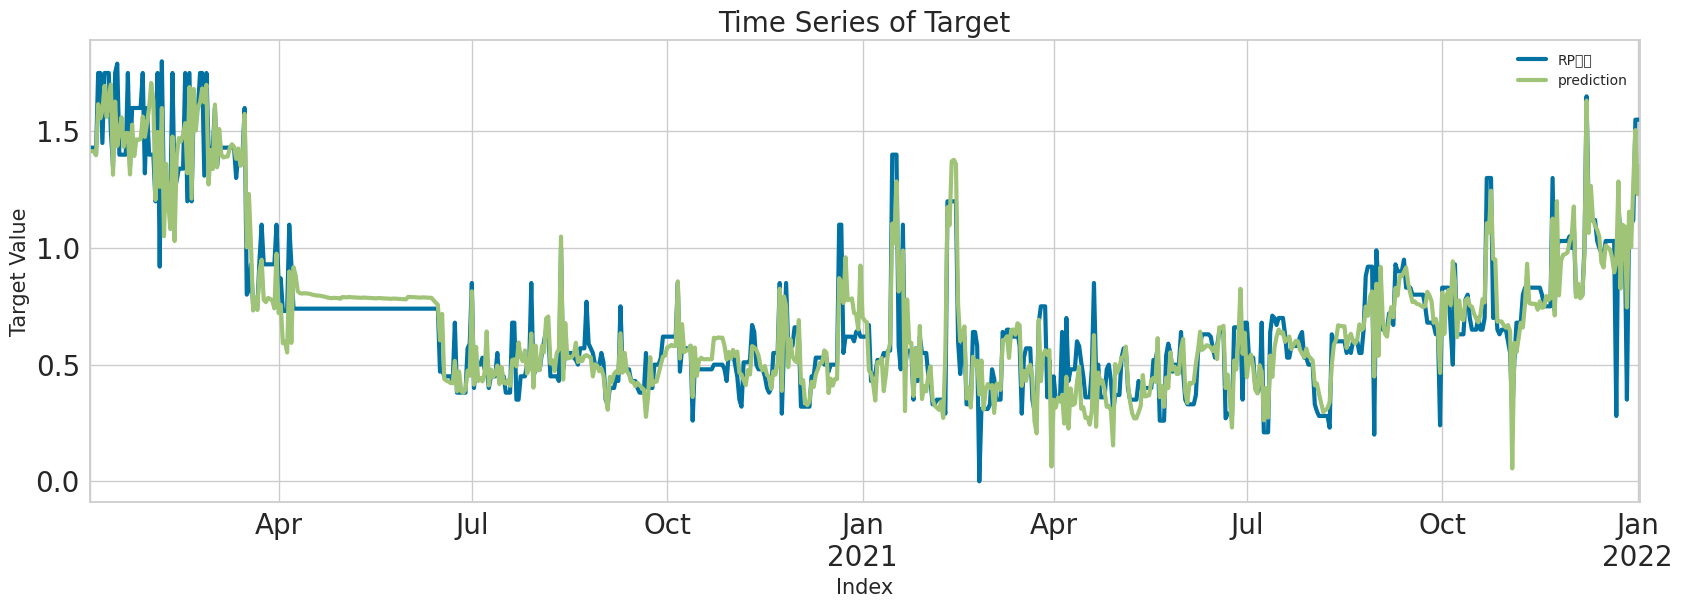

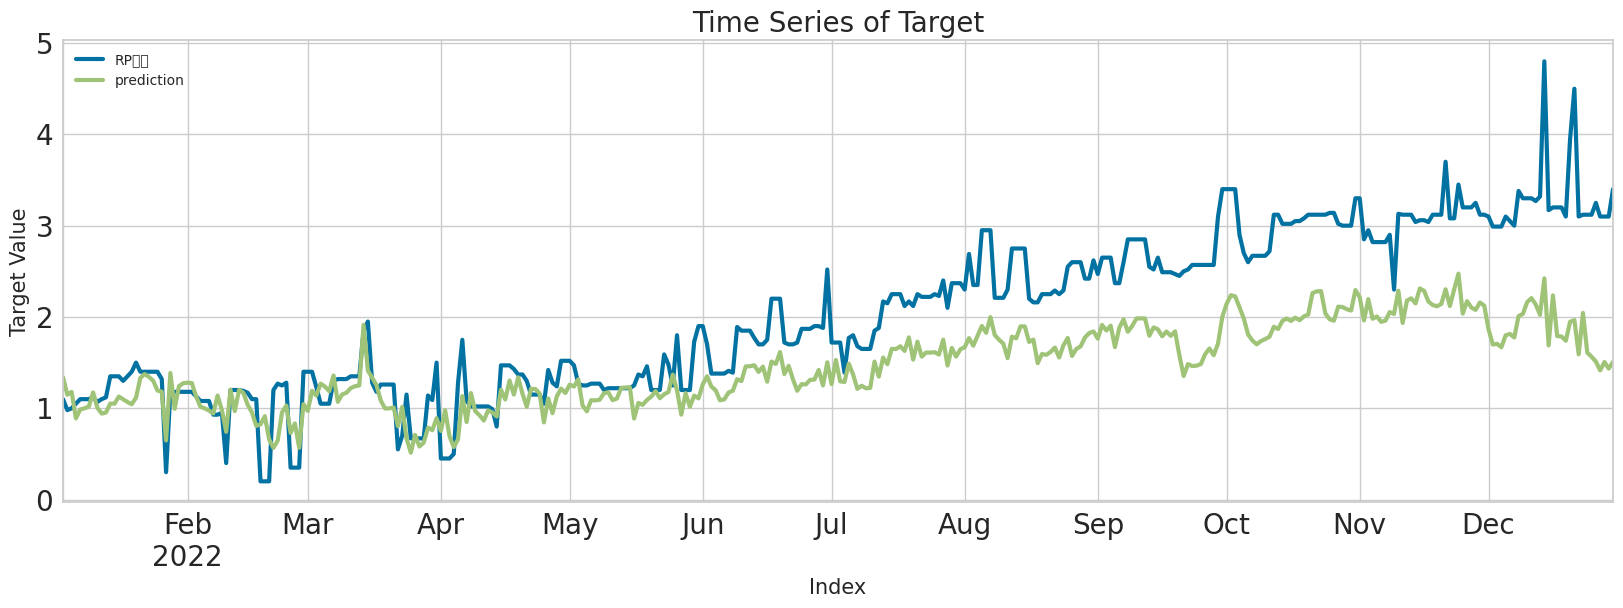

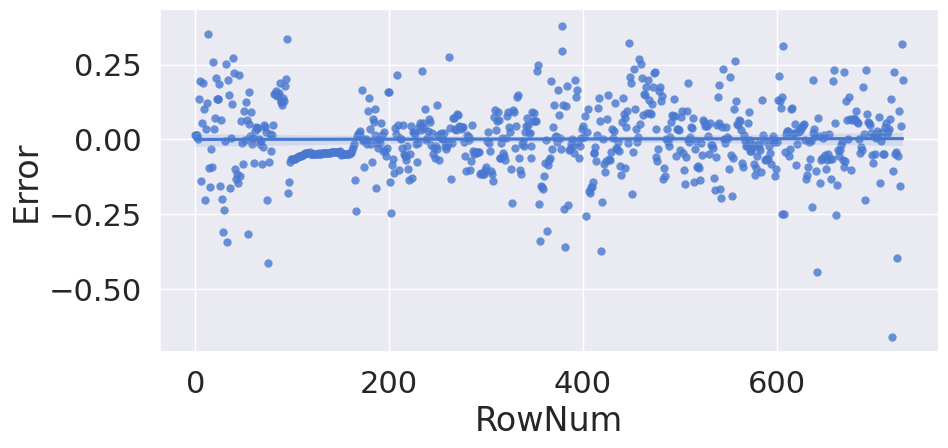

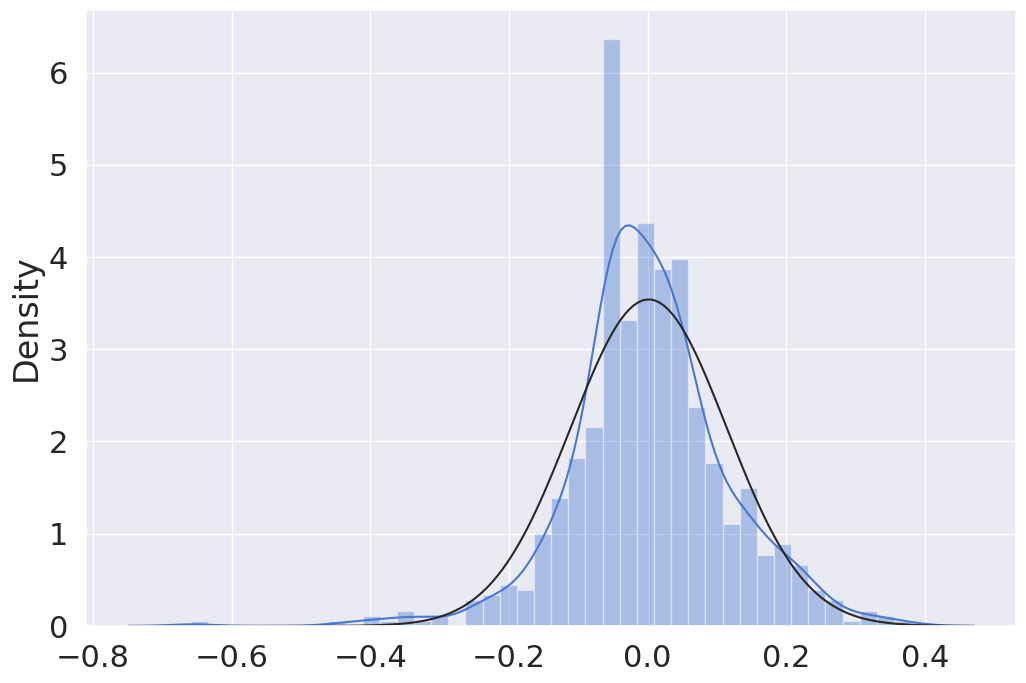

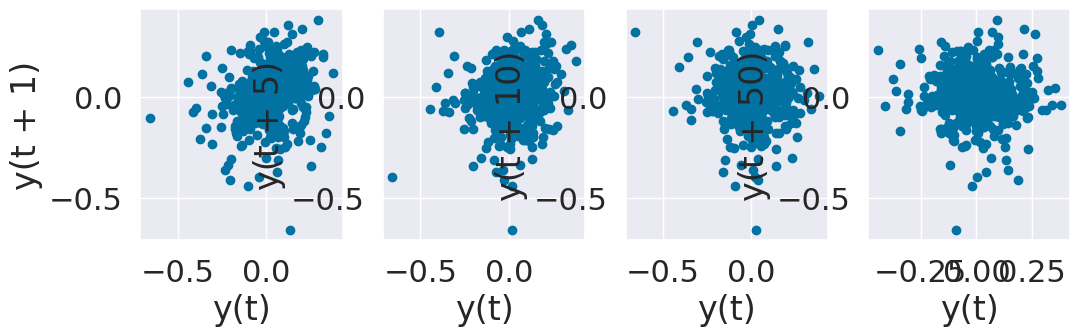

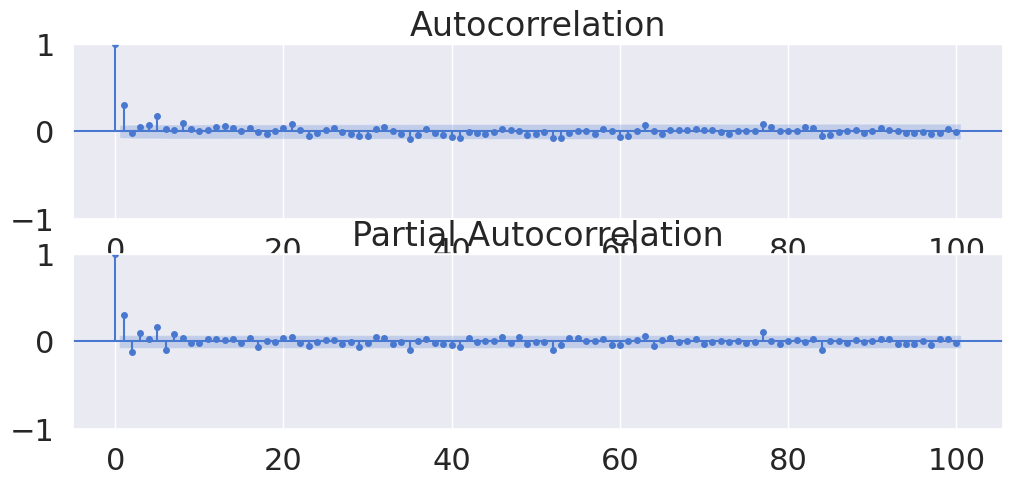

In [8]:
if __name__ == "__main__" :
    main()
    # 2020-01-10(2) Error
    # 클래스를 이용해서 객체를 생성하고 참조값을 변수에 담기

* 조건수(Condition ~ Number)
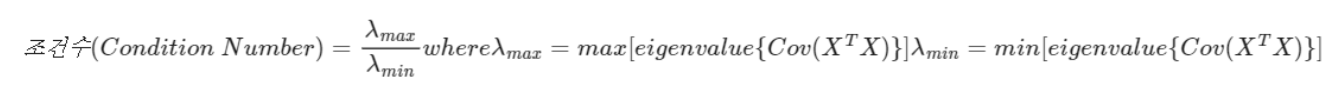

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

```
  correlation = X_train_fe.corr()
  mask = np.zeros_like(correlation, dtype = np.bool)
  mask[np.triu_indices_from( mask )] = True
    # 상관분석 히트맵 삼각형 마스크(위 쪽 삼각형에 True, 아래 삼각형에 False)
  sns.heatmap(data = correlation,
            cmap = "GnBu_r",
              # [colormap 팔레트]
            annot = True,
              # [실제값 표시]
            fmt = "0.01f",
              # [소수점 둘째 자리까지 표시]
            mask = mask,
              # [표시하지 않을 위쪽 삼각형 마스크 부분 지정]
            linewidths = 0.5,
              # [경계면 실선으로 구분]
            vmin = -1,
            vmax = 1
              # [colorbar의 범위 -1 ~ 1로 지정]
  )
  plt.show()
```

(2) 피처 엔지니어링을 통한 척도 변환 및 VIF(분산팽창인자)를 통한 변수 선택

In [9]:
def main():

  TSA = TimeSeriesFeatureEngineering(
    trading_repo_path = "/content/drive/MyDrive/archive/CaseForTradingRepoData.csv",
    bs_repo_path = "/content/drive/MyDrive/archive/BuyRepoSecuritiesBalance.csv")

  repo_data = TSA.ImportDataset()
  repo_data_fe = TSA.FeatureEngineering(
      date_column = "기준일자",
      dataframe = repo_data,
      Y = "RP이율",
        # "RP증거금비율"
      decompose_method = "additive",
      grouping_feature = "매입증권수")

  X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = TSA.DataSplitofTimeSeries(
      cleandataframe = repo_data_fe,
      Y_colname = "RP이율",
      X_colname = repo_data_fe.drop("RP이율", axis = 1).columns,
      criteria = "2022-01-03")

  minmaxscale = MinMaxScaler()
    # MinMaxScaler | StandardScaler | RobustScaler | Normalizer
  X_train_fe_scaling = pd.DataFrame(
      minmaxscale.fit_transform(X_train_fe),
      index = X_train_fe.index, columns = X_train_fe.columns)
  X_test_fe_scaling = pd.DataFrame(
      minmaxscale.fit_transform(X_test_fe),
      index = X_test_fe.index, columns = X_test_fe.columns)
  # for column_num in range(len(X_train_fe_scaling)):
    #print(X_train_fe_scaling.iloc[:, column_num-1].describe(), X_test_fe_scaling.iloc[:, column_num-1].describe())
      # IndexError: single positional indexer is out-of-bounds


# 특징 공학 : (1) 조건수(선형결합에 따른 고윳값의 최대최소 격차) (2) 척도 변환
  fit_reg_fe = sm.OLS(
      Y_train_fe, X_train_fe_scaling
      # np.asarray(X_train_fe)
  ).fit()
    # [ValueError] Pandas data cast to numpy dtype of object. Check input data with np.asarray(data)
  display(fit_reg_fe.summary())
  pred_reg_train_fe = fit_reg_fe.predict(X_train_fe_scaling).values
  pred_reg_test_fe = fit_reg_fe.predict(X_test_fe_scaling).values

  score_reg_fe, residuals_reg_train_fe, residuals_reg_test_fe = TSA.EvaluationofTrainTestPairs(
      Y_train_fe, pred_reg_train_fe,
      Y_test_fe, pred_reg_test_fe,
      graph_on = True)
  display(score_reg_fe)
    # <class 'pandas.core.series.Series'>
  TSA.StationaryADFTest(Y_data = Y_train_fe)
  # TSFE.StationaryKPSSTest(Y_data = Y_train_fe)
  TSA.PlotErrorAnalysis(
      residuals_reg_train_fe,
      X_train_fe_scaling, graph_on = True)
  TSA.TimeSeriesConditinalTest(
      Y_data = Y_train_fe,
        # KeyError: "None of [Index(['RP이율'], dtype='object', name='DateTime')] are in the [index]"
      X_data = X_train_fe_scaling)


X_train : (731, 26) Y_train : (731,)
X_test : (362, 26) Y_test : (362,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RP이율   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.411e+29
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:33:36   Log-Likelihood:                 23590.
No. Observations:                 731   AIC:                        -4.713e+04
Df Residuals:                     706   BIC:                        -4.702e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
매입증권수             6.023e-15   4.23e-15      1.423      0.155   -2.29e-15    1.43e-14
매입증권매입금액         -3.077e-14   2.19e-14     -1.408      0.160   -7.37e-14    1.21e-14
매입증권평가금액          1.904e-14   1.95e-14      0.979      0.328   -1.92e-14    5.72e-14
RP매입금액                    0   1.93e-15          0      1.000   -3.79e-15    3.79e-15
RP증거금비율           4.149e-15    2.4e-15      1.732      0.084   -5.55e-16    8.85e-15
기타채권담보금액            -0.0096   1.27e-15  -7.54e+12      0.000      -0.010      -0.010
ETF담보금액             -0.0380    1.3e-15  -2.94e+13      0.000      -0.038      -0.038
지방채담보금액             -0.0497   1.08e-15  -4.61e+13      0.000      -0.050      -0.050
담보총합계금액              5.2592   1.17e-14   4.48e+14      0.000       5.259       5.259
RP회사채담보금액           -0.3333   1.48e-15  -2.25e+14      0.000      -0.333      -0.333
RP금융채담보금액           -1.1060   2.55e-15  -4.34e+14      0.000      -1.106      -1.106
RP국채담보금액            -4.4844   9.82e-15  -4.57e+14      0.000      -4.484      -4.484
RP통안채담보금액           -0.6264   1.42e-15  -4.42e+14      0.000      -0.626      -0.626
RP특수채담보금액           -0.3645    1.3e-15   -2.8e+14      0.000      -0.365      -0.365
y_trend           2.012e-15   2.01e-15      0.999      0.318   -1.94e-15    5.97e-15
y_seasonal        7.216e-16   6.35e-16      1.137      0.256   -5.24e-16    1.97e-15
y_day            -1.395e-15   1.16e-15     -1.205      0.229   -3.67e-15    8.77e-16
y_week            3.331e-16   7.27e-16      0.458      0.647   -1.09e-15    1.76e-15
y_difference         1.7400   1.22e-15   1.42e+15      0.000       1.740       1.740
Year              8.576e-15   1.01e-15      8.509      0.000     6.6e-15    1.06e-14
Quarter           2.984e-15   4.92e-16      6.058      0.000    2.02e-15    3.95e-15
Quarter_version2  -9.27e-15    1.1e-15     -8.454      0.000   -1.14e-14   -7.12e-15
Day              -2.021e-16   3.22e-16     -0.628      0.530   -8.34e-16     4.3e-16
DayofWeek          3.43e-16    7.3e-16      0.470      0.638   -1.09e-15    1.78e-15
Y_lag1               1.8000   1.76e-15   1.02e+15      0.000       1.800       1.800
Y_lag2           -2.984e-16   1.15e-15     -0.260      0.795   -2.55e-15    1.95e-15
==============================================================================
Omnibus:                       24.112   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.300
Skew:                          -0.326   Prob(JB):                     9.69e-08
Kurtosis:                       3.797   Cond. No.                     1.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-29. Thi

,MAE,MSE,MAPE
Train,2.109424e-15,5.462178e-30,NaN
Test,9.981143e-01,1.212526e+00,49.236592


                              stationarity_adf
Test Statistics                      -2.497312
P-value                               0.116130
Used Lag                             15.000000
Used Observations                   715.000000
Critical Values(1%)                  -3.439529
Maximum Information Criteria       -550.983667
Empty DataFrame
Columns: []
Index: [Test Statistics, p-value]
                    Normality Heteroscedasticity
Test Statistics  8.704369e-01           0.118057
p-value          3.906831e-24                0.0
Alternative               NaN          two-sided


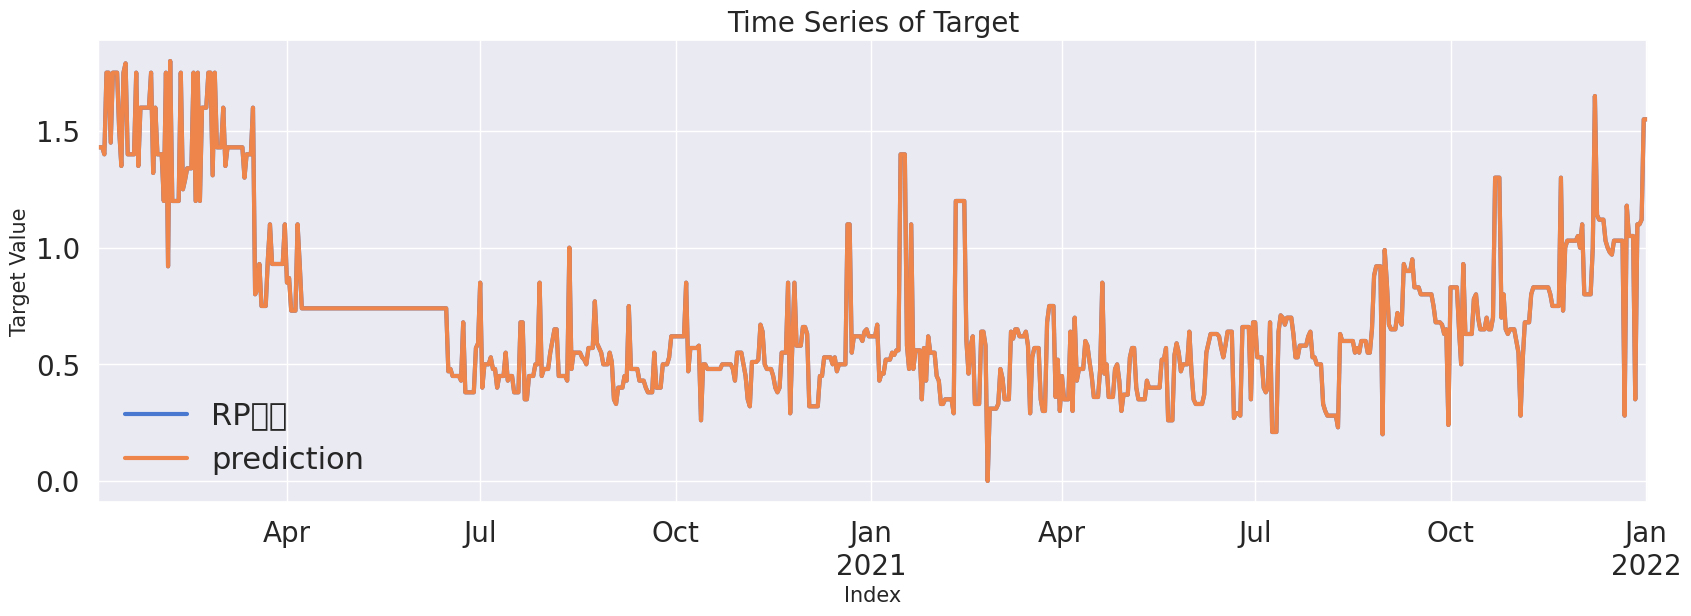

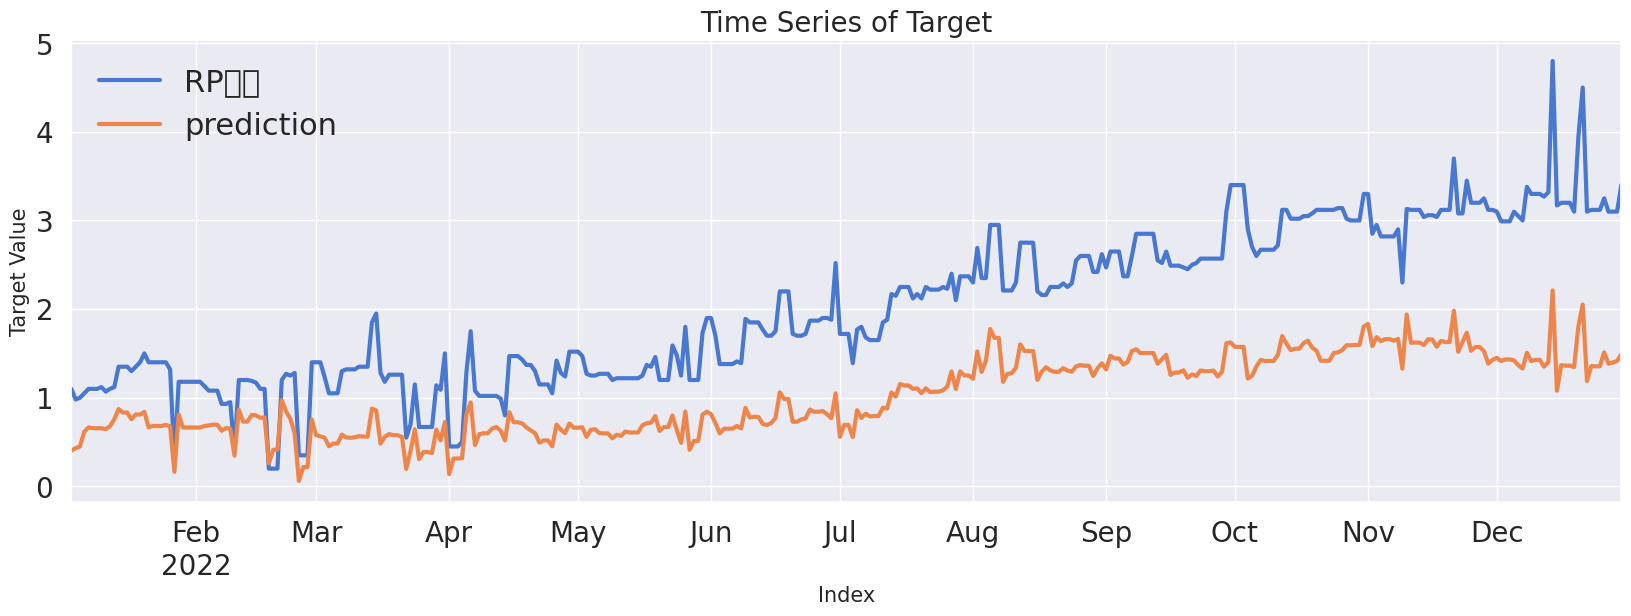

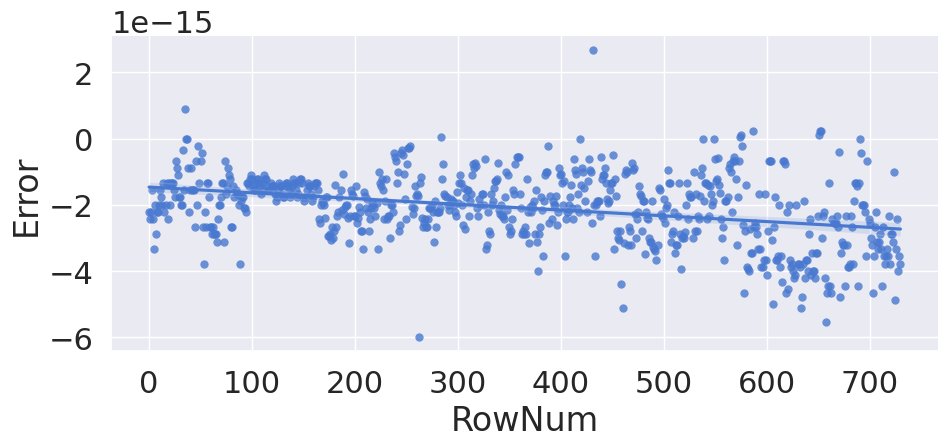

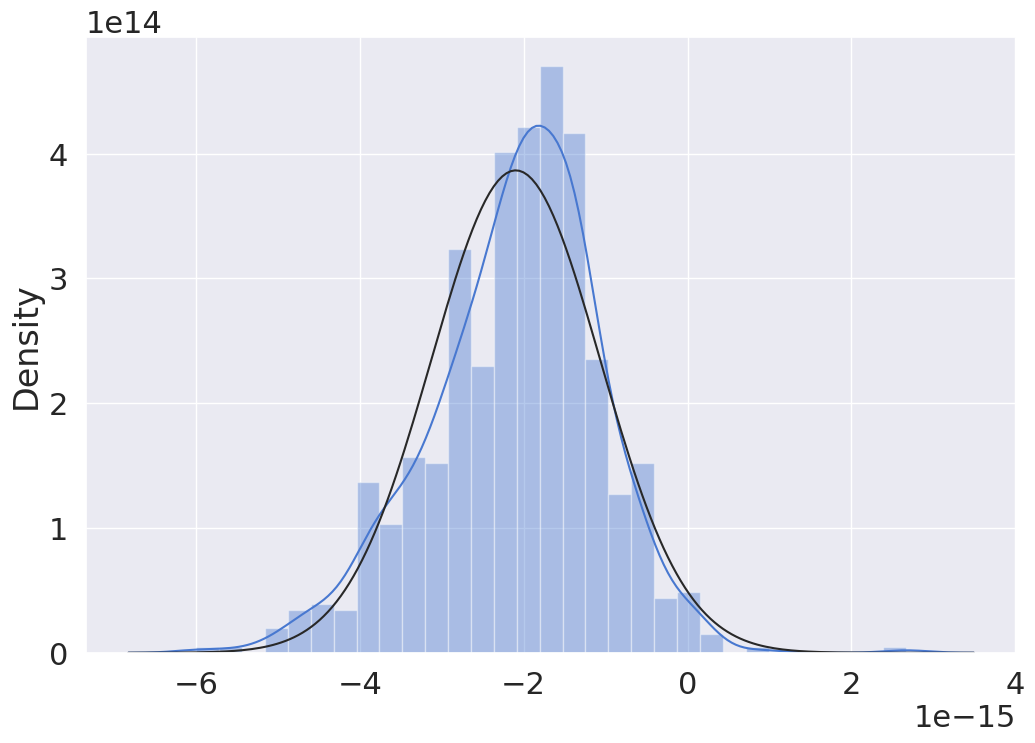

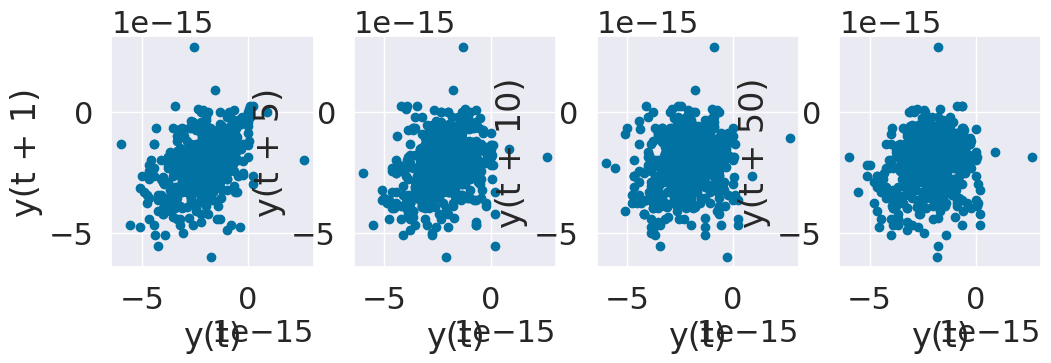

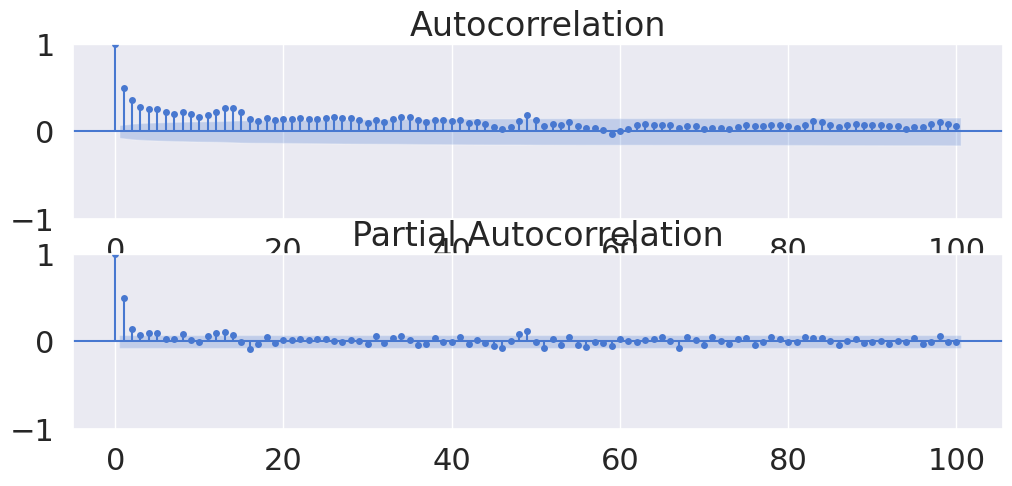

In [10]:
if __name__ == "__main__" :
    main()

##### 2) 다중공선성(Multicolinearity) 제거 : 아래의 설명은 모두 동질적 의미

* 독립변수의 일부가 다른 독립변수의 조합으로 표현될 수 있는 경우

  다중공선성(설명변수 X들 상호 선형독립으로, **X1으로 설명되는 Y의 분산과 X2로 설명되는 Y의 분산이 서로 겹치는 부분**은

  **회귀계수의 분산을 높이고 크기를 작게 만들어 회귀계수가 유의하게 나오지 않도록** 할 가능성을 높인다.

  즉, 독립변수들이 서로 독립이 아니고 상호 상관관계가 강한 경우에는 **오차의 변동에 따라 회귀계수 Beta 등이 민감하게 변화하여 신뢰할 수 없다.**

---

* 이걸 알기 위해서는 다중회귀분석의 회귀계수와 분산이 어떻게 나타나는지 살펴볼 필요가 있다.

* 분산팽창인자 $ VIF_i = \frac{1}{1-R_i^2} = \frac{1}{X_i(i번째 설명변수)를 종속변수로 하고, X(다른 모든 설명변수)로 적합한 회귀식의 결정계수에서 1을 뺀 값} $

  설명변수가 서로 상관관계가 0일 때 비교하는 척도인 분산팽창인자(VIF)

  결국 VIF가 높다는 것은 독립변수 $X_i$를 다른 독립변수들로 선형회귀한 성능인 결정계수 $R_i^2$가 낮은 값이며, $X_i$는 종속성이 높으므로 제거대상

* 회귀계수의 분산 $ VIF_1 = Var(\hat{\beta}_1) = \frac{S_{X_2X_2}}{S_{X_1X_1} - S_{X1X2}^2} ⋅ σ^2 = \frac{X_2의 분산}{X_1의 분산과 X_2의 분산의 곱 - X1과 X2의 공분산의 제곱} ⋅ σ^2 $

  X1과 X2의 공분산(하필 또 -제곱한 값)이 클수록 회귀계수의 분산이 커진다는 것을 의미한다. 회귀계수의 분산이 커진다면, 회귀계수의 유의성을 검정하는 t검정에서 귀무가설을 기각하기 어려워진다.

* 회귀계수 $ \hat{\beta_1} = \frac{S_{X_1Y}⋅S_{X_2X2} - S_{X2Y}⋅S_{X1X2}}{S_{X1X1}⋅S_{X2X2} - S_{X1X2}⋅S_{X1X2}} = \frac{X_1과 Y의 공분산과 X_2의 분산의 곱 - X_2와 Y의 공분산과 X_1과 X_2의 공분산의 곱}{X_1의 분산과 X_2의 분산의 곱 - X1과 X2의 공분산의 제곱}$

  X1과 X2의 공분산(하필 또 -제곱한 값)이 클수록 회귀계수의 크기가 작아질 수 있다는 것을 의미한다.

---

* 독립변수의 공분산 행렬(covariance matrix) 벡터공간(vector space)의 차원과 독립변수의 차원이 같지 않은 경우(full rank가 아닌 경우)


##### 3) 이분산성의 영향

* 이분산성도 다중공선성과 같이 회귀계수의 분산을 높이는 문제를 가져온다. (오차의 분산이 X의 값에 따라 커지는 경우로 잔차의 산점도로 확인하기도 함)

* $B_1, H$의 분산 = $ Var(\hat{\beta_1}_{,H}) = \frac{σ^2}{\Sigma_{i=1}^n{(X_i - \bar{X})^2}} + 𝛾⋅\frac{\Sigma_{i=1}^n{X_i^2⋅(X_i - \bar{X})^2}}{\Sigma_{i=1}^n{((X_i - \bar{X})^2})^2} = 이분산성이 없을 때의 분산 + 양수\cdot이분산성의 정도$

* Breusch-Pagan, White검정에서 회귀분석으로 얻은 잔차를 가지고 다시 회귀분석하여 X로 잔차가 설명되는지 검정하며, 영가설은 등분산성이 성립할 경우로 설정한다.

* 이분산성이 성립할 경우 Hetero skedasticity - consistent standard error(HC) 즉, 강건한 표준오차로 잔차를 조정하여야 한다.

In [11]:
def main():

  TSA = TimeSeriesFeatureEngineering(
    trading_repo_path = "/content/drive/MyDrive/archive/CaseForTradingRepoData.csv",
    bs_repo_path = "/content/drive/MyDrive/archive/BuyRepoSecuritiesBalance.csv")

  repo_data = TSA.ImportDataset()
  repo_data_fe = TSA.FeatureEngineering(
      date_column = "기준일자",
      dataframe = repo_data,
      Y = "RP이율",
        # "RP증거금비율"
      decompose_method = "additive",
      grouping_feature = "매입증권수")

  X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = TSA.DataSplitofTimeSeries(
      cleandataframe = repo_data_fe,
      Y_colname = "RP이율",
      X_colname = repo_data_fe.drop("RP이율", axis = 1).columns,
      criteria = "2022-01-03")

  minmaxscale = MinMaxScaler()
    # MinMaxScaler | StandardScaler | RobustScaler | Normalizer
  X_train_fe_scaling = pd.DataFrame(
      minmaxscale.fit_transform(X_train_fe),
      index = X_train_fe.index, columns = X_train_fe.columns)
  X_test_fe_scaling = pd.DataFrame(
      minmaxscale.fit_transform(X_test_fe),
      index = X_test_fe.index, columns = X_test_fe.columns)
  # for column_num in range(len(X_train_fe_scaling)):
    #print(X_train_fe_scaling.iloc[:, column_num-1].describe(), X_test_fe_scaling.iloc[:, column_num-1].describe())
      # IndexError: single positional indexer is out-of-bounds


# 다중공선성 제거와 상관계수 히트맵
  display(X_train_fe.corr().style.background_gradient().set_precision(2).set_properties(**{"font-size":"11pt"}))

  TSA.VarainceInflationFactor(
      X_train_data =  X_train_fe_scaling,
      X_test_data = X_test_fe_scaling,
      Y_train_data = Y_train_fe,
      Y_test_data = Y_test_fe)


# 특징 공학 : (1) 조건수(선형결합에 따른 고윳값의 최대최소 격차) (2) 척도 변환
  fit_reg_fe = sm.OLS(
      Y_train_fe, X_train_fe_scaling
      # np.asarray(X_train_fe)
  ).fit()
    # [ValueError] Pandas data cast to numpy dtype of object. Check input data with np.asarray(data)
  display(fit_reg_fe.summary())
  pred_reg_train_fe = fit_reg_fe.predict(X_train_fe_scaling).values
  pred_reg_test_fe = fit_reg_fe.predict(X_test_fe_scaling).values

  score_reg_fe, residuals_reg_train_fe, residuals_reg_test_fe = TSA.EvaluationofTrainTestPairs(
      Y_train_fe, pred_reg_train_fe,
      Y_test_fe, pred_reg_test_fe,
      graph_on = True)
  display(score_reg_fe)
    # <class 'pandas.core.series.Series'>

  TSA.StationaryADFTest(Y_data = Y_train_fe)
  # TSFE.StationaryKPSSTest(Y_data = Y_train_fe)
  TSA.PlotErrorAnalysis(
      residuals_reg_train_fe,
      X_train_fe_scaling, graph_on = True)
  TSA.TimeSeriesConditinalTest(
      Y_data = Y_train_fe,
        # KeyError: "None of [Index(['RP이율'], dtype='object', name='DateTime')] are in the [index]"
      X_data = X_train_fe_scaling)


X_train : (731, 26) Y_train : (731,)
X_test : (362, 26) Y_test : (362,)


,매입증권수,매입증권매입금액,매입증권평가금액,RP매입금액,RP증거금비율,기타채권담보금액,ETF담보금액,지방채담보금액,담보총합계금액,RP회사채담보금액,RP금융채담보금액,RP국채담보금액,RP통안채담보금액,RP특수채담보금액,y_trend,y_seasonal,y_day,y_week,y_difference,Year,Quarter,Quarter_version2,Day,DayofWeek,Y_lag1,Y_lag2
매입증권수,1.00,0.97,0.97,0.93,-0.13,-0.00,-0.18,0.05,0.14,0.11,0.05,0.16,-0.16,0.11,0.02,-0.10,-0.05,-0.14,0.02,0.11,0.10,0.15,0.04,0.09,0.03,0.01
매입증권매입금액,0.97,1.00,1.00,0.90,-0.13,-0.01,-0.21,0.05,0.15,0.13,0.06,0.17,-0.18,0.10,-0.01,-0.09,-0.06,-0.17,-0.01,0.14,0.07,0.16,0.05,0.09,-0.00,-0.01
매입증권평가금액,0.97,1.00,1.00,0.89,-0.13,-0.01,-0.21,0.05,0.14,0.13,0.06,0.17,-0.18,0.09,-0.01,-0.09,-0.06,-0.16,-0.01,0.14,0.07,0.16,0.05,0.09,-0.00,-0.01
RP매입금액,0.93,0.90,0.89,1.00,-0.13,0.02,-0.18,0.04,0.14,0.11,0.05,0.16,-0.16,0.11,0.04,-0.08,-0.02,-0.12,0.02,0.12,0.08,0.15,0.02,0.07,0.06,0.03
RP증거금비율,-0.13,-0.13,-0.13,-0.13,1.00,-0.17,0.66,-0.43,-0.59,-0.52,-0.48,-0.60,0.44,-0.32,0.22,0.05,0.27,0.58,-0.01,-0.63,-0.16,-0.63,-0.03,-0.05,0.21,0.20
기타채권담보금액,-0.00,-0.01,-0.01,0.02,-0.17,1.00,-0.27,0.06,0.47,0.52,0.25,0.47,-0.11,0.18,0.15,-0.01,0.08,-0.13,0.02,0.31,0.11,0.32,0.05,0.01,0.15,0.12
ETF담보금액,-0.18,-0.21,-0.21,-0.18,0.66,-0.27,1.00,-0.52,-0.86,-0.73,-0.64,-0.88,0.72,-0.57,0.16,0.00,0.26,0.71,-0.02,-0.93,-0.22,-0.92,-0.02,-0.00,0.15,0.16
지방채담보금액,0.05,0.05,0.05,0.04,-0.43,0.06,-0.52,1.00,0.55,0.40,0.60,0.49,-0.45,0.57,-0.31,-0.01,-0.30,-0.30,-0.04,0.58,0.12,0.57,-0.01,0.01,-0.28,-0.28
담보총합계금액,0.14,0.15,0.14,0.14,-0.59,0.47,-0.86,0.55,1.00,0.78,0.80,0.98,-0.57,0.68,-0.14,-0.01,-0.24,-0.60,0.02,0.81,0.35,0.88,0.04,0.01,-0.13,-0.15
RP회사채담보금액,0.11,0.13,0.13,0.11,-0.52,0.52,-0.73,0.40,0.78,1.00,0.44,0.79,-0.49,0.50,-0.25,0.00,-0.36,-0.66,0.02,0.64,0.61,0.86,0.05,0.00,-0.24,-0.25


100%|██████████| 26/26 [00:04<00:00,  5.66it/s]


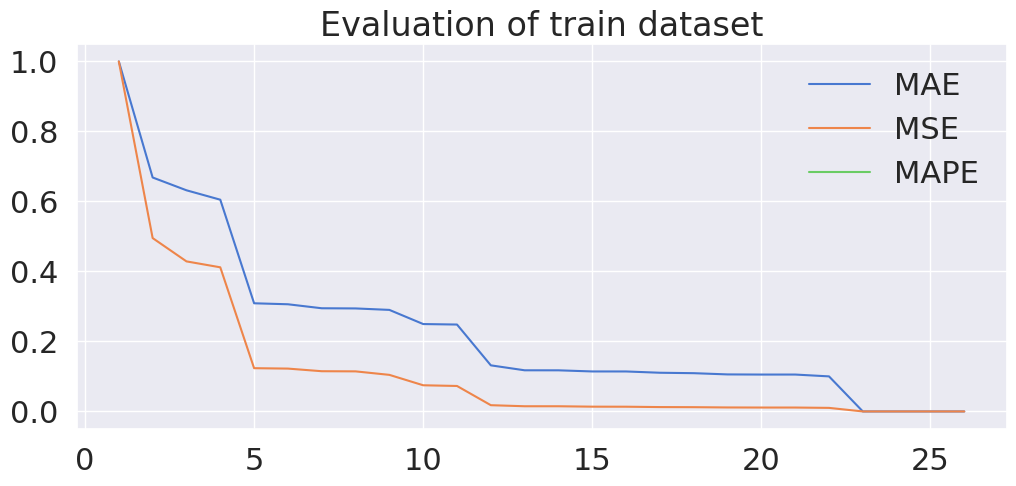

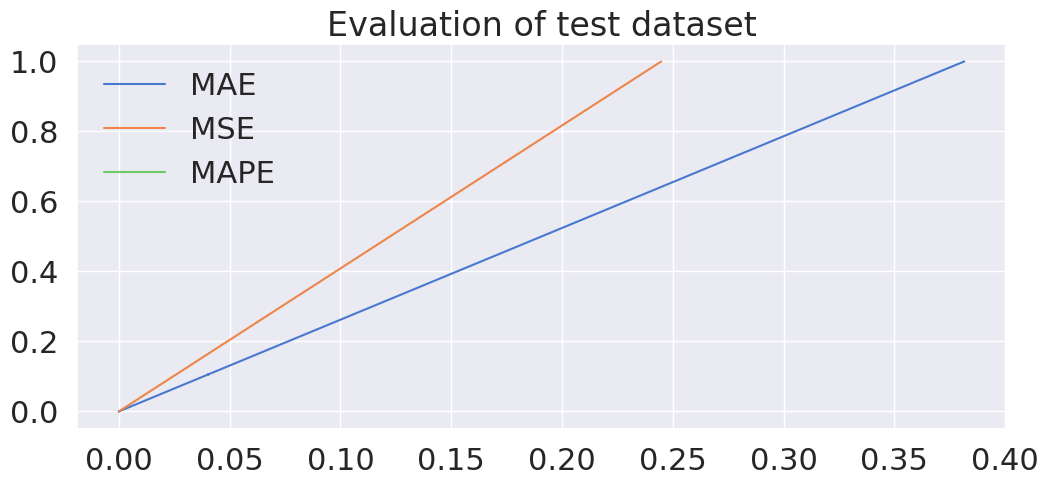

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RP이율   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.411e+29
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:34:29   Log-Likelihood:                 23590.
No. Observations:                 731   AIC:                        -4.713e+04
Df Residuals:                     706   BIC:                        -4.702e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
매입증권수             6.023e-15   4.23e-15      1.423      0.155   -2.29e-15    1.43e-14
매입증권매입금액         -3.077e-14   2.19e-14     -1.408      0.160   -7.37e-14    1.21e-14
매입증권평가금액          1.904e-14   1.95e-14      0.979      0.328   -1.92e-14    5.72e-14
RP매입금액                    0   1.93e-15          0      1.000   -3.79e-15    3.79e-15
RP증거금비율           4.149e-15    2.4e-15      1.732      0.084   -5.55e-16    8.85e-15
기타채권담보금액            -0.0096   1.27e-15  -7.54e+12      0.000      -0.010      -0.010
ETF담보금액             -0.0380    1.3e-15  -2.94e+13      0.000      -0.038      -0.038
지방채담보금액             -0.0497   1.08e-15  -4.61e+13      0.000      -0.050      -0.050
담보총합계금액              5.2592   1.17e-14   4.48e+14      0.000       5.259       5.259
RP회사채담보금액           -0.3333   1.48e-15  -2.25e+14      0.000      -0.333      -0.333
RP금융채담보금액           -1.1060   2.55e-15  -4.34e+14      0.000      -1.106      -1.106
RP국채담보금액            -4.4844   9.82e-15  -4.57e+14      0.000      -4.484      -4.484
RP통안채담보금액           -0.6264   1.42e-15  -4.42e+14      0.000      -0.626      -0.626
RP특수채담보금액           -0.3645    1.3e-15   -2.8e+14      0.000      -0.365      -0.365
y_trend           2.012e-15   2.01e-15      0.999      0.318   -1.94e-15    5.97e-15
y_seasonal        7.216e-16   6.35e-16      1.137      0.256   -5.24e-16    1.97e-15
y_day            -1.395e-15   1.16e-15     -1.205      0.229   -3.67e-15    8.77e-16
y_week            3.331e-16   7.27e-16      0.458      0.647   -1.09e-15    1.76e-15
y_difference         1.7400   1.22e-15   1.42e+15      0.000       1.740       1.740
Year              8.576e-15   1.01e-15      8.509      0.000     6.6e-15    1.06e-14
Quarter           2.984e-15   4.92e-16      6.058      0.000    2.02e-15    3.95e-15
Quarter_version2  -9.27e-15    1.1e-15     -8.454      0.000   -1.14e-14   -7.12e-15
Day              -2.021e-16   3.22e-16     -0.628      0.530   -8.34e-16     4.3e-16
DayofWeek          3.43e-16    7.3e-16      0.470      0.638   -1.09e-15    1.78e-15
Y_lag1               1.8000   1.76e-15   1.02e+15      0.000       1.800       1.800
Y_lag2           -2.984e-16   1.15e-15     -0.260      0.795   -2.55e-15    1.95e-15
==============================================================================
Omnibus:                       24.112   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.300
Skew:                          -0.326   Prob(JB):                     9.69e-08
Kurtosis:                       3.797   Cond. No.                     1.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-29. Thi

,MAE,MSE,MAPE
Train,2.109424e-15,5.462178e-30,NaN
Test,9.981143e-01,1.212526e+00,49.236592


                              stationarity_adf
Test Statistics                      -2.497312
P-value                               0.116130
Used Lag                             15.000000
Used Observations                   715.000000
Critical Values(1%)                  -3.439529
Maximum Information Criteria       -550.983667
Empty DataFrame
Columns: []
Index: [Test Statistics, p-value]
                    Normality Heteroscedasticity
Test Statistics  8.704369e-01           0.118057
p-value          3.906831e-24                0.0
Alternative               NaN          two-sided


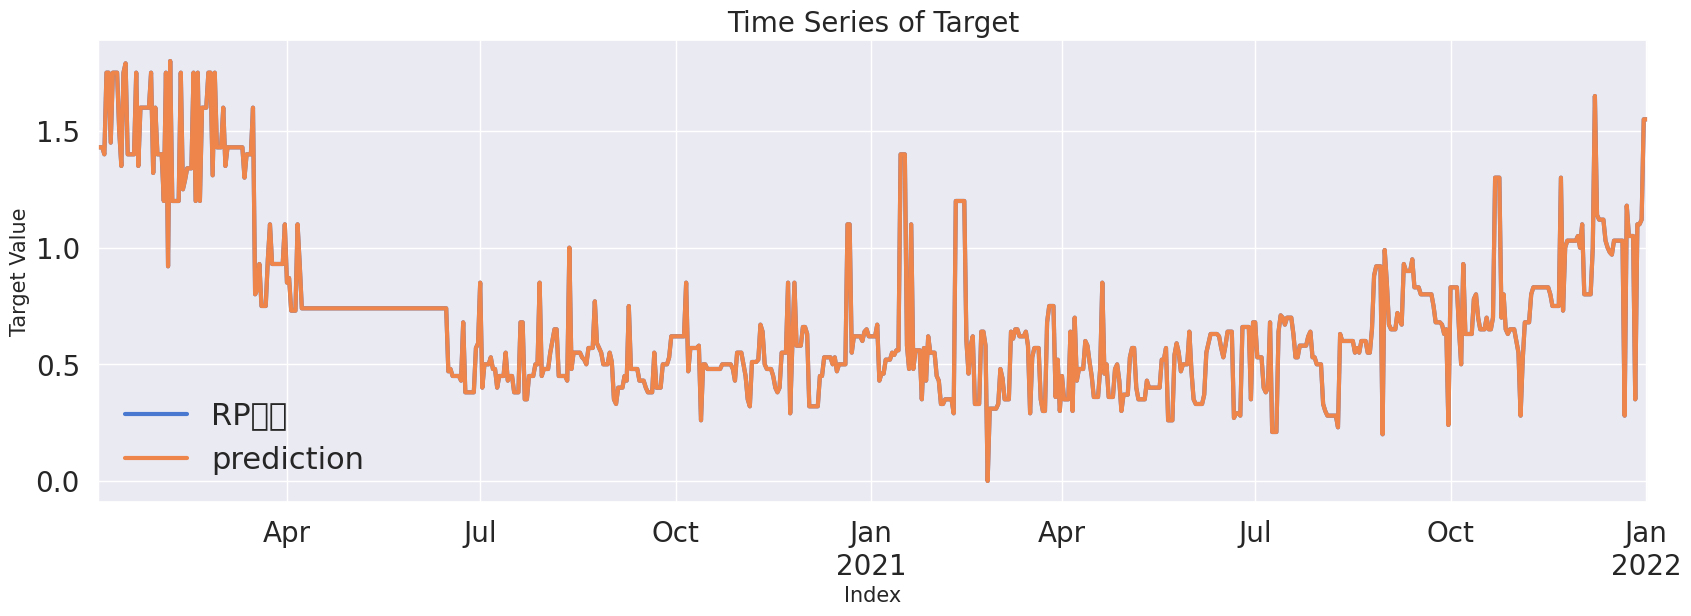

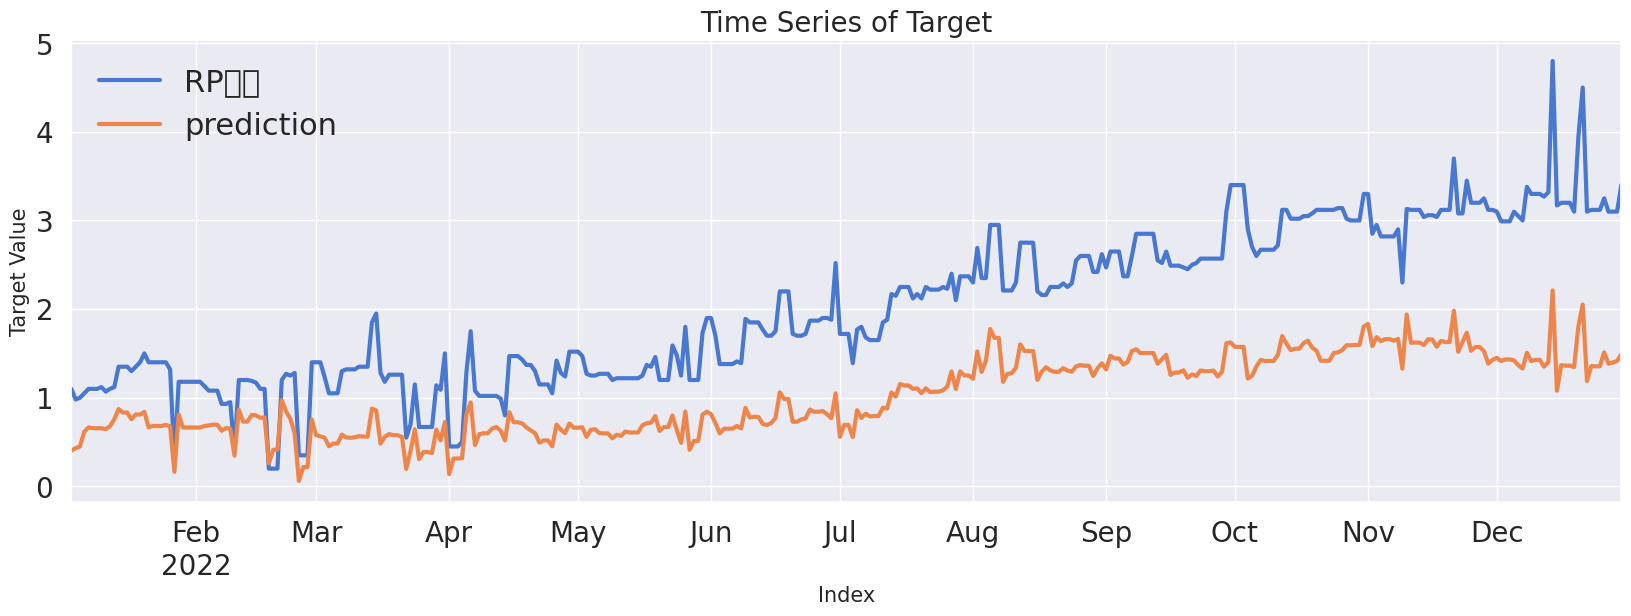

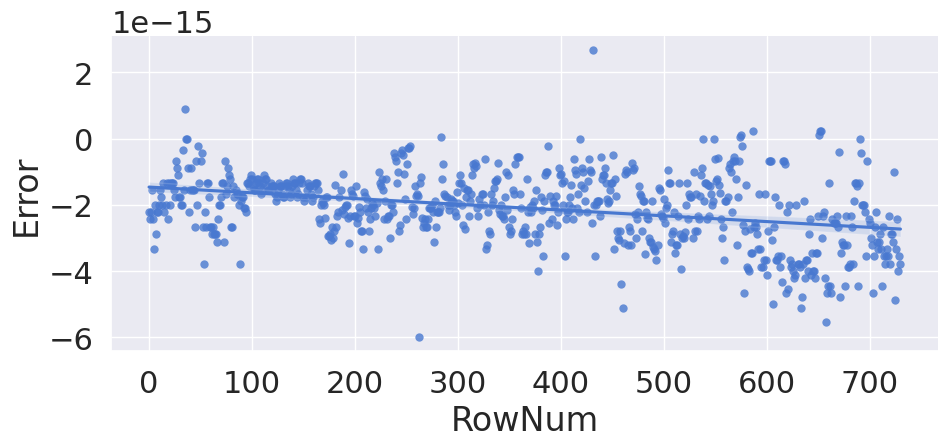

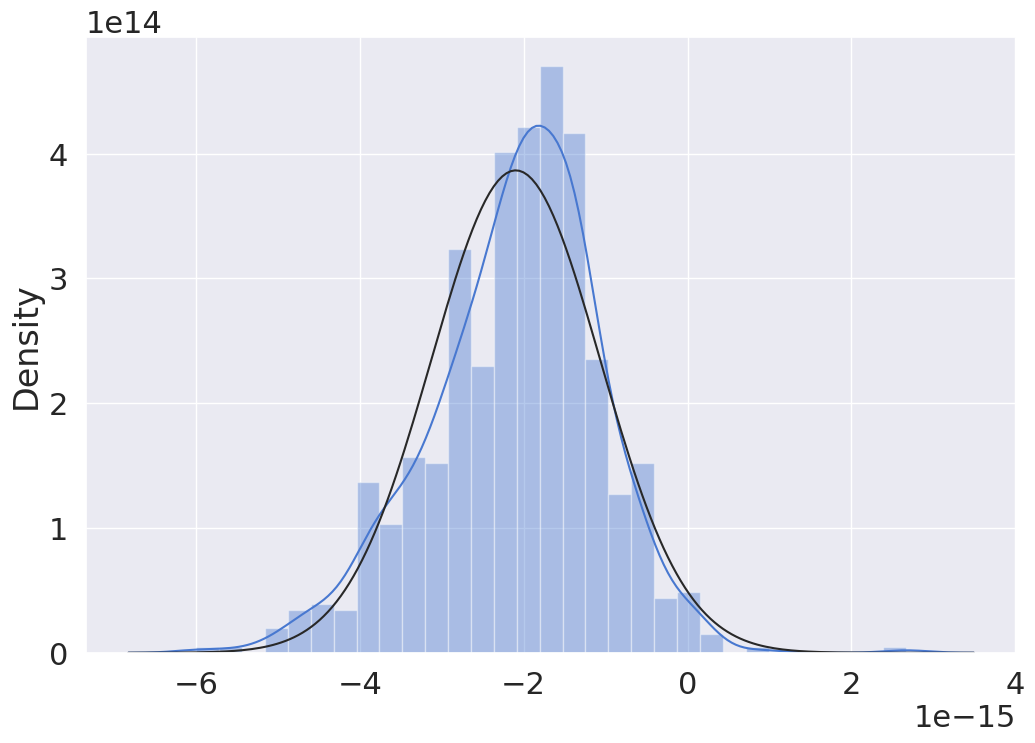

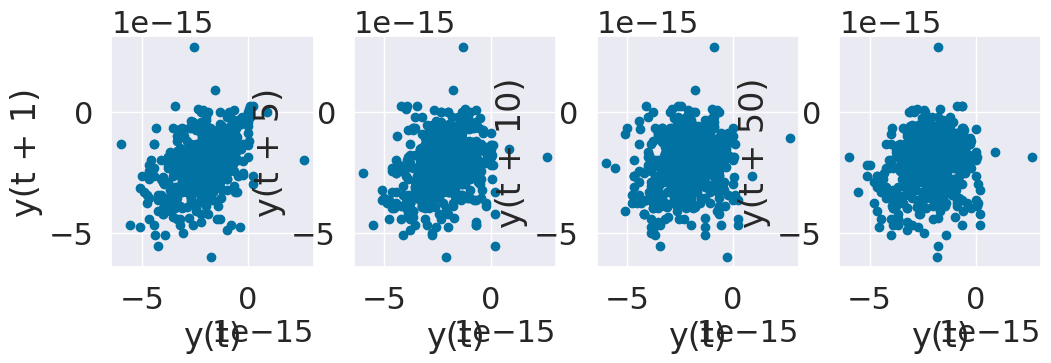

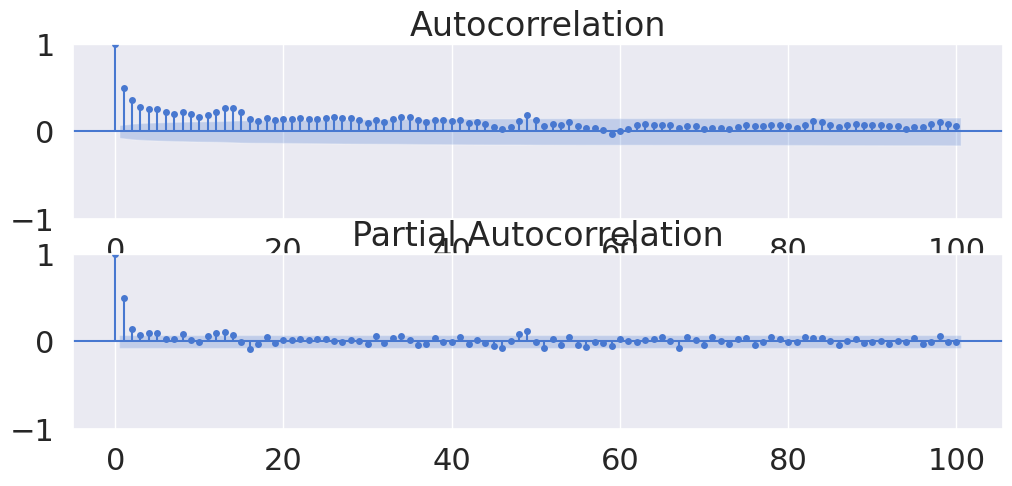

In [12]:
# 독립변수를 다른 독립변수들로 선형회귀한 성능을 나타내며 가장 상호의존적인 독립변수를 제거한다.
# "독립변수간에 상관관계가 있다면 추정한 계수들의 분산이 커진다"

if __name__ == "__main__" :
    main()
  # 매입증권매입금액, 매입증권평가금액, RP매입금액

* 13개의 독립변수를 넣을 때와 24개의 독립변수를 넣을 때 성능이 유사하므로, 11개의 변수는 multiple correlation이 성립한다. (다중공선성)
* <1단계> 커뮤니케이션: X -- 문제정의: f(X) -> 기획 및 평가: Y
* <2단계> 정리: X -- 생각: f(X) -> 기획: Y
* <3단계> 기획: Y -- 평가: f(Y) -> 끝/시작: Y/X

#### 5.Feature Engineering: 종속변수 Y의 현실적 데이터 전처리 방향

##### 1) 정상성(stationarity)

* **넓은 범위의 값들의 범위를 제한하여 쉽게 활용하자는 관점**(예측 성능 향상과 파라미터 수 감소)

  1차 모산텀은 평균, 2차 모멘텀은 분산/공분산, 3차 모멘텀은 왜도, 4차 모멘텀은 첨도

  시간이 흐르더라도 평균, 분산이 일정하고 X_i 사이에 어떤 두 시점의 cross momentum(자기공분산)이 일정한 경우를 약정상성이 성립한다고 한다. 즉, 잔차들이 시간의 흐름에 따라 상관성이 없어야 한다.

  Y의 정상성이 성립하여야 하는 이유는? y = f(X) 분석 이후 어떻게 해석하는지, 활용할지 생각해본다. ROLLBACK을 통한 재사용을 위함이다.

* Random walk와 White nosie가 반복될 수 있으며,
금융 데이에서 price보다 return이 유리할 수 있다는 점

* $(m^p)*a_1 + (m^{p-1})*a_2 + \cdot $ 계수가 1에 가까울수록 시계열 데이터는 평균에서 벗어나는 경향을 보이며,
데이터의 계수 $m$이 1에 가까운지(있는지 없는지)를 체크하는 통계량 Augmented Dickey Fuller Test Statistics
$m=1$일 경우 단위근(unit too)이 있다고 표현하며, 단위근을 제거하기 위해 차분(differencing)하면 WN이 정상 데이터로 변환되는 수학 형태

##### 2) 자기상관성(autocorrelation, AR)

* 자기상관이란 시계열 데이터가 방향과 보폭이 임의적이라도(임의보행) 새롭게 옮겨갈 위치는 과거의 것과 상관이 있다는 것을 말한다.

In [ ]:
def main():

  BaselineLM = TimeSeriesFeatureEngineering(
    trading_repo_path = "/content/drive/MyDrive/archive/CaseForTradingRepoData.csv",
    bs_repo_path = "/content/drive/MyDrive/archive/BuyRepoSecuritiesBalance.csv")

  repo_data = BaselineLM.ImportDataset()
  repo_data_fe = BaselineLM.FeatureEngineering(
      date_column = "기준일자",
      dataframe = repo_data,
      Y = "RP이율",
        # "RP증거금비율"
      decompose_method = "additive",
      grouping_feature = "매입증권수")

  X_train_fe, X_test_fe, Y_train_fe, Y_test_fe = BaselineLM.DataSplitofTimeSeries(
      cleandataframe = repo_data_fe,
      Y_colname = "RP이율",
      X_colname = repo_data_fe.drop("RP이율", axis = 1).columns,
      criteria = "2022-01-03")
  # BaselineLM.SolveMultiCollinearity(X_train_data = )

  minmaxscale = MinMaxScaler()
    # MinMaxScaler | StandardScaler | RobustScaler | Normalizer
  X_train_fe_scaling = pd.DataFrame(
      minmaxscale.fit_transform(X_train_fe),
      index = X_train_fe.index, columns = X_train_fe.columns)
  X_test_fe_scaling = pd.DataFrame(
      minmaxscale.fit_transform(X_test_fe),
      index = X_test_fe.index, columns = X_test_fe.columns)


# 특징 공학 : (1) 조건수(선형결합에 따른 고윳값의 최대최소 격차) (2) 척도 변환
  fit_reg_fe = sm.OLS(
      Y_train_fe, X_train_fe_scaling
      # np.asarray(X_train_fe)
  ).fit()
    # [ValueError] Pandas data cast to numpy dtype of object. Check input data with np.asarray(data)
  display(fit_reg_fe.summary())
  pred_reg_train_fe = fit_reg_fe.predict(X_train_fe_scaling).values
  pred_reg_test_fe = fit_reg_fe.predict(X_test_fe_scaling).values

  score_reg_fe, residuals_reg_train_fe, residuals_reg_test_fe = BaselineLM.EvaluationofTrainTestPairs(
      Y_train_fe, pred_reg_train_fe,
      Y_test_fe, pred_reg_test_fe,
      graph_on = True)
  display(score_reg_fe)
    # <class 'pandas.core.series.Series'>

  BaselineLM.StationaryADFTest(Y_data = Y_train_fe)
  # TSFE.StationaryKPSSTest(Y_data = Y_train_fe)
  BaselineLM.PlotErrorAnalysis(
      residuals_reg_train_fe,
      X_train_fe_scaling, graph_on = True)
  BaselineLM.TimeSeriesConditinalTest(
      Y_data = Y_train_fe,
        # KeyError: "None of [Index(['RP이율'], dtype='object', name='DateTime')] are in the [index]"
      X_data = X_train_fe_scaling)


In [ ]:
if __name__ == "__main__" :
    main()

### **2.시계열 알고리즘**

* 시계열 관련 기계학습 알고리즘
* 타겟 데이터의 정상성 변환 이해
* 단순 선형 확률과정
* 적분 선형 확률과정
* 비선형 확률과정
* 다변량 선형확률과정

  y_1, y_2, ..., y가 늘어날 경우에는 어떻게 접근해야 하는지

  y = f(X)라면, X = f(y)가 될 가능성은 없는지
  (예를 들어, X = 비용, y = 매출)